In [1]:
# Make Jupyter full screen (not necessary on Colab)
from IPython.display import display, HTML
display(HTML("<style>.container { width:150% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
from sklearn.preprocessing import QuantileTransformer
from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

import warnings
warnings.filterwarnings('ignore')

%config Completer.use_jedi = False
%load_ext watermark
%watermark --iversions
    

avg_evapo.pdf
avg_evapo.png
avg_rh.pdf
avg_rh.png
avg_soil_moisture.pdf
avg_soil_moisture.png
avg_sunshine.pdf
avg_sunshine.png
avg_temp.pdf
avg_temp.png
climate_data_corr_resultsH.xlsx
climate_data_corr_results.xlsx
climate_data_.csv
correl_matrix_taylor.pdf
correl_matrix_taylor.png
data
dataframe_output_1.tex
dataframe_output.tex
direc_flag_indices
direc_flag_indices_1
do_script_teleconnection_edit_0.ipynb
do_script_teleconnection.ipynb
drop_some_indices.ipynb
gam_summary.tex
imputed_Indices_all_edited_2024-05-19.csv
Indices_all.csv
Indices_all_edited.csv
Kintampo_1.csv
Kintampo_c.csv
local_climate_data_analysis_Edit_0.ipynb
martin_indices
ols_prcp_1.tex
ols_prcp.tex
ols_tmax_1.tex
ols_tmax.tex
ols_tmin_1.tex
ols_tmin.tex
output_flag_indices
paper_res-Copy1.ipynb
paper_res-Copy2.ipynb
paper_res.ipynb
Revised_indices&climate_variable_analysis.ipynb
summary_stats.tex
total_rainfall.pdf
total_rainfall.png
uk
Untitled.ipynb

numpy     : 1.26.4
pandas    : 2.2.3
seaborn   : 0.13.2
matplot

* **List all available font families in Matplotlib and choose one that suits your preference**

In [3]:
import matplotlib.font_manager as fm

# Get a list of all available font names
font_names = [f.name for f in fm.fontManager.ttflist]

# Print the list of font names
for font in font_names:
    print(font)

DejaVu Sans
cmss10
cmb10
STIXSizeTwoSym
STIXSizeTwoSym
cmmi10
STIXSizeFourSym
DejaVu Serif
STIXSizeFiveSym
STIXSizeThreeSym
cmsy10
DejaVu Serif
DejaVu Sans Mono
STIXNonUnicode
STIXSizeThreeSym
cmex10
DejaVu Serif
DejaVu Sans
cmr10
DejaVu Sans Mono
DejaVu Sans
STIXGeneral
STIXSizeFourSym
STIXGeneral
STIXGeneral
DejaVu Serif Display
DejaVu Sans Mono
STIXSizeOneSym
STIXSizeOneSym
DejaVu Sans Display
DejaVu Sans Mono
STIXGeneral
cmtt10
STIXNonUnicode
STIXNonUnicode
STIXNonUnicode
DejaVu Serif
DejaVu Sans
Waree
P052
Noto Sans Mono
Waree
Noto Sans Arabic
Noto Sans Hanifi Rohingya
Likhan
Noto Sans Kayah Li
Garuda
Noto Sans New Tai Lue
Cousine
Lato
Noto Sans Meetei Mayek
Noto Sans Oriya
Noto Sans Thaana
Samanata
Tinos
padmaa
Noto Sans Rejang
Lato
Jamrul
Ubuntu
Noto Serif Dogra
Noto Sans Osage
FreeMono
KacstTitleL
Noto Sans Old Sogdian
Noto Sans Chakma
URW Bookman
Noto Sans Hebrew
Umpush
Ubuntu Mono
Noto Sans Lao
Suranna
Peddana
Noto Sans Tifinagh Hawad
Noto Sans Lydian
TenaliRamakrishna
Tlwg T

* https://medium.datadriveninvestor.com/data-pre-processing-with-scikit-learn-9896c561ef2f

In [4]:
import matplotlib as mpl
plt.rc("text", usetex=False)

# Specify the font family directly
mpl.rcParams['font.family'] = 'DejaVu Serif' #Liberation Serif

In [5]:
import os
# Define the name of the output directory
output_dir = "direc_GH"

# Check if the directory already exists
if not os.path.exists(output_dir):
    # If not, create the directory
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created successfully.")
else:
    print(f"Directory '{output_dir}' already exists.")

Directory 'direc_GH' created successfully.


In [6]:
!pwd

/home/dara/my_project/anarh/projectA/Kasare


In [11]:
data_dir = '/home/dara/my_project/anarh/projectA/Kasare/data'

* Read rainfall data

In [12]:
import pandas as pd
import glob

# Specify the path where your CSV files are located
path_to_your_csv_files = "data/Rainfall"
file_path = f"{data_dir}/{path_to_your_csv_files}/*.csv"

# Create an empty list to hold DataFrames
dataframes = []

# Read each CSV file and process
for i, file in enumerate(glob.glob(file_path), start=1):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Create a new column for Date by combining Day, Month, and Year
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    
    # Select only the Date and Value columns, renaming Value column
    df = df[['Date', 'Value']]
    df.columns = ['Date', f'Name{i}']  # Rename Value to Name1, Name2, etc.

    # Append to the list
    dataframes.append(df)

# Merge all DataFrames on Date
combined_df = dataframes[0]
for df in dataframes[1:]:
    combined_df = pd.merge(combined_df, df, on='Date', how='outer')

# Sort by Date
combined_df.sort_values('Date', inplace=True)

# Save to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)


ValueError: cannot assemble the datetimes: day is out of range for month, at position 60. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# df = pd.read_csv(f"{data_dir}"'Indices_all_edited.csv')
# df.drop(columns=['Unnamed: 0', 'nino34'], inplace=True)
# df.head(n=100)

In [13]:
import pandas as pd
import glob

# Specify the base directory where your CSV files are located
# data_dir = "data"  # Define data_dir here if not already defined
# path_to_your_csv_files = "Rainfall"
file_path = f"{data_dir}/{path_to_your_csv_files}/*.csv"

# Print the file path to check if it is correct
print("Looking for CSV files in:", file_path)

# Create an empty list to hold DataFrames
dataframes = []

# Read each CSV file and process
for i, file in enumerate(glob.glob(file_path), start=1):
    print(f"Processing file: {file}")  # Print the current file being processed
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Create a new column for Date by combining Day, Month, and Year
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    
    # Select only the Date and Value columns, renaming Value column
    df = df[['Date', 'Value']]
    df.columns = ['Date', f'Name{i}']  # Rename Value to Name1, Name2, etc.

    # Append to the list
    dataframes.append(df)

# Check if dataframes list is empty
if not dataframes:
    print("No DataFrames were created. Please check your CSV files.")
else:
    # Merge all DataFrames on Date
    combined_df = dataframes[0]
    for df in dataframes[1:]:
        combined_df = pd.merge(combined_df, df, on='Date', how='outer')

    # Sort by Date
    combined_df.sort_values('Date', inplace=True)

    # Save to a new CSV file
    combined_df.to_csv('combined_data.csv', index=False)

Looking for CSV files in: /home/dara/my_project/anarh/projectA/Kasare/data/data/Rainfall/*.csv
Processing file: /home/dara/my_project/anarh/projectA/Kasare/data/data/Rainfall/Rainfall_Akatsi.csv


ValueError: cannot assemble the datetimes: day is out of range for month, at position 60. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [14]:
import pandas as pd
import glob
from datetime import datetime

# Specify the base directory where your CSV files are located
# data_dir = "data"  # Define data_dir here if not already defined
# path_to_your_csv_files = "Rainfall"
file_path = f"{data_dir}/{path_to_your_csv_files}/*.csv"

# Print the file path to check if it is correct
print("Looking for CSV files in:", file_path)

# Create an empty list to hold DataFrames
dataframes = []

# Function to validate date
def is_valid_date(year, month, day):
    try:
        datetime(year, month, day)
        return True
    except ValueError:
        return False

# Read each CSV file and process
for i, file in enumerate(glob.glob(file_path), start=1):
    try:
        df = pd.read_csv(file)
        
        # Print the first few rows to check values
        print(f"Processing file: {file}")
        print(df.head())  # Print the first few rows of the DataFrame

        # Check for valid dates
        invalid_dates = df[~df.apply(lambda row: is_valid_date(row['Year'], row['Month'], row['Day']), axis=1)]
        
        if not invalid_dates.empty:
            print(f"Invalid date rows in {file}:")
            print(invalid_dates[['Year', 'Month', 'Day']])
            # Optionally, you can choose to skip this file or drop invalid rows
            df = df[df.apply(lambda row: is_valid_date(row['Year'], row['Month'], row['Day']), axis=1)]

        # Create a new column for Date by combining Day, Month, and Year
        df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
        
        # Select only the Date and Value columns, renaming Value column
        df = df[['Date', 'Value']]
        df.columns = ['Date', f'Name{i}']  # Rename Value to Name1, Name2, etc.

        # Append to the list
        dataframes.append(df)

    except Exception as e:
        print(f"Error processing {file}: {e}")

# Check if dataframes list is empty
if not dataframes:
    print("No DataFrames were created. Please check your CSV files.")
else:
    # Merge all DataFrames on Date
    combined_df = dataframes[0]
    for df in dataframes[1:]:
        combined_df = pd.merge(combined_df, df, on='Date', how='outer')

    # Sort by Date
    combined_df.sort_values('Date', inplace=True)

    # Save to a new CSV file
    combined_df.to_csv('combined_data.csv', index=False)
    print("Combined data saved to 'combined_data.csv'")


Looking for CSV files in: /home/dara/my_project/anarh/projectA/Kasare/data/data/Rainfall/*.csv
Processing file: /home/dara/my_project/anarh/projectA/Kasare/data/data/Rainfall/Rainfall_Akatsi.csv
   Day  Month  Year  Value    Name
0    1      1  1980    0.0  Akatsi
1    2      1  1980    0.0  Akatsi
2    3      1  1980    0.0  Akatsi
3    4      1  1980    0.0  Akatsi
4    5      1  1980    0.0  Akatsi
Invalid date rows in /home/dara/my_project/anarh/projectA/Kasare/data/data/Rainfall/Rainfall_Akatsi.csv:
       Year  Month  Day
60     1980      2   30
61     1980      2   31
123    1980      4   31
185    1980      6   31
278    1980      9   31
...     ...    ...  ...
15654  2022      2   31
15716  2022      4   31
15778  2022      6   31
15871  2022      9   31
15933  2022     11   31

[290 rows x 3 columns]
Processing file: /home/dara/my_project/anarh/projectA/Kasare/data/data/Rainfall/Rainfall_Takoradi.csv
   Day  Month  Year  Value      Name
0    1      1  1980    0.0  Takoradi
1 

In [15]:
import pandas as pd
import glob
from datetime import datetime

file_path = f"{data_dir}/{path_to_your_csv_files}/*.csv"

# Print the file path to check if it is correct
print("Looking for CSV files in:", file_path)

# Create an empty list to hold DataFrames
dataframes = []

# Function to validate date
def is_valid_date(year, month, day):
    try:
        datetime(year, month, day)
        return True
    except ValueError:
        return False

# Read each CSV file and process
for i, file in enumerate(glob.glob(file_path), start=1):
    try:
        df = pd.read_csv(file)
        
        # Print the first few rows to check values
        print(f"Processing file: {file}")
        print(df.head())  # Print the first few rows of the DataFrame

        # Check for valid dates
        invalid_dates = df[~df.apply(lambda row: is_valid_date(row['Year'], row['Month'], row['Day']), axis=1)]
        
        if not invalid_dates.empty:
            print(f"Invalid date rows in {file}:")
            print(invalid_dates[['Year', 'Month', 'Day']])
            # Optionally, you can choose to skip this file or drop invalid rows
            df = df[df.apply(lambda row: is_valid_date(row['Year'], row['Month'], row['Day']), axis=1)]

        # Create a new column for Date by combining Day, Month, and Year
        df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
        
        # Select only the Date and Value columns
        df = df[['Date', 'Value']]
        
        # Extract the name from the filename, ignoring "Rainfall_" and ".csv"
        name = file.split('/')[-1].replace('Rainfall_', '').replace('.csv', '')
        
        # Rename Value to the extracted name
        df.columns = ['Date', name]  # Rename Value to the extracted name

        # Append to the list
        dataframes.append(df)

    except Exception as e:
        print(f"Error processing {file}: {e}")

# Check if dataframes list is empty
if not dataframes:
    print("No DataFrames were created. Please check your CSV files.")
else:
    # Merge all DataFrames on Date
    combined_df = dataframes[0]
    for df in dataframes[1:]:
        combined_df = pd.merge(combined_df, df, on='Date', how='outer')

    # Sort by Date
    combined_df.sort_values('Date', inplace=True)

    # Save to a new CSV file
    combined_df.to_csv('combined_data_0.csv', index=False)
    print("Combined data saved to 'combined_data.csv'")

Looking for CSV files in: /home/dara/my_project/anarh/projectA/Kasare/data/data/Rainfall/*.csv
Processing file: /home/dara/my_project/anarh/projectA/Kasare/data/data/Rainfall/Rainfall_Akatsi.csv
   Day  Month  Year  Value    Name
0    1      1  1980    0.0  Akatsi
1    2      1  1980    0.0  Akatsi
2    3      1  1980    0.0  Akatsi
3    4      1  1980    0.0  Akatsi
4    5      1  1980    0.0  Akatsi
Invalid date rows in /home/dara/my_project/anarh/projectA/Kasare/data/data/Rainfall/Rainfall_Akatsi.csv:
       Year  Month  Day
60     1980      2   30
61     1980      2   31
123    1980      4   31
185    1980      6   31
278    1980      9   31
...     ...    ...  ...
15654  2022      2   31
15716  2022      4   31
15778  2022      6   31
15871  2022      9   31
15933  2022     11   31

[290 rows x 3 columns]
Processing file: /home/dara/my_project/anarh/projectA/Kasare/data/data/Rainfall/Rainfall_Takoradi.csv
   Day  Month  Year  Value      Name
0    1      1  1980    0.0  Takoradi
1 

In [16]:
df = combined_df.copy()#pd.DataFrame(data)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Aggregation functions
aggregation_funcs = {
    'weekly': df.resample('W').sum(),           # Weekly
    'biweekly': df.resample('2W').sum(),     # Biweekly
    'monthly': df.resample('M').sum(),        # Monthly
    'bimonthly': df.resample('2M').sum(),     # Bimonthly
    'quarterly': df.resample('Q').sum(),      # Quarterly
    'semiannually': df.resample('6M').sum(),  # Semi-Annually
    'yearly': df.resample('Y').sum()          # Yearly
}

# Print the results
for key, value in aggregation_funcs.items():
    print(f"\n{key.capitalize()}:\n{value}\n")



Weekly:
            Akatsi  Takoradi  Abetifi  Kete-Krachi  KIAMO-Accra  Akim_Oda  \
Date                                                                        
1980-01-06     0.0       0.0      0.0          0.0          0.0       0.0   
1980-01-13     0.0       0.0      0.0          0.0          0.0      12.5   
1980-01-20     0.0       0.0      0.0          0.0          0.0       0.0   
1980-01-27     0.0       0.3      0.0          0.0          0.0       8.1   
1980-02-03     0.0       0.0      0.0          0.0          0.0       0.0   
...            ...       ...      ...          ...          ...       ...   
2022-12-04    28.6       0.0     51.3          0.0          7.9      49.7   
2022-12-11     0.0       0.0      0.0          0.0          0.0       4.3   
2022-12-18     3.2       0.4      0.0          0.0          0.0      25.5   
2022-12-25     0.0       0.0      0.0          0.0          0.0       2.7   
2023-01-01     0.0       0.0      0.0          0.0          0.0    

In [17]:
df_mon = pd.DataFrame(aggregation_funcs['monthly'])
df_mon.head()

Akatsi  Takoradi  Abetifi  Kete-Krachi  KIAMO-Accra  Akim_Oda  \
Date                                                                        
1980-01-31     0.0       0.3      0.0          0.0          0.0      20.6   
1980-02-29     0.0       1.8      0.0          5.1          5.3      62.6   
1980-03-31     0.0      89.5      0.0         14.2         36.6     186.3   
1980-04-30     2.3     229.1      0.0         35.5        181.1     107.9   
1980-05-31    17.9     380.7      0.0        135.7        245.0     199.1   

              Ada     Wa  Akuse  Wenchi  ...  Tamale   Axim   Tema  Yendi  \
Date                                     ...                                
1980-01-31    0.0   18.1    0.3    27.8  ...     6.5   82.8    0.0    6.8   
1980-02-29   36.6    4.5   39.6    31.0  ...     0.0   33.8   41.4    0.0   
1980-03-31   24.7    7.3   75.6    37.1  ...     0.3  152.2   47.1   38.6   
1980-04-30  114.6  142.7   67.5   195.4  ...    95.9  169.7  157.4   48.9   
1980-05-31  183.8   70.4  198.6    78.1  ...    99.1  442.4  266.3  110.9   

            Saltpond   Bole     Ho  Kumasi  Navrongo  Sefwi_Bekwai  
Date                                                                
1980-01-31       0.4    6.1   14.1     5.1       0.0          12.0  
1980-02-29      12.5   17.5  177.2   100.9       0.0         151.6  
1980-03-31      90.8   15.8   24.1    49.0       0.3         128.2  
1980-04-30      55.6   33.1  224.0    53.8      74.5          57.9  
1980-05-31     354.9  169.9  228.2   120.0      95.9         326.8  

[5 rows x 22 columns]

<Figure size 1440x800 with 0 Axes>

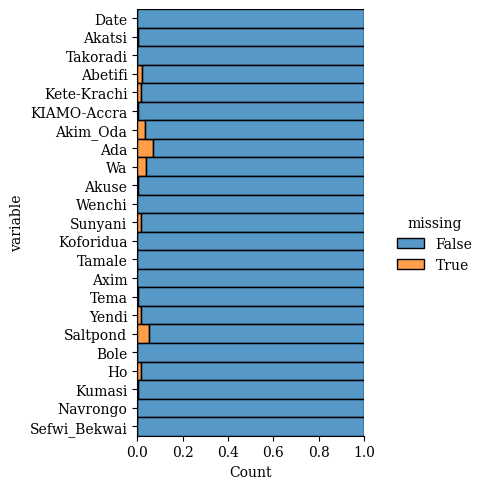

In [19]:
plt.figure(figsize=(18,10), dpi=80)
sns.displot(
    data=combined_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=0.8
)

<Figure size 1440x800 with 0 Axes>

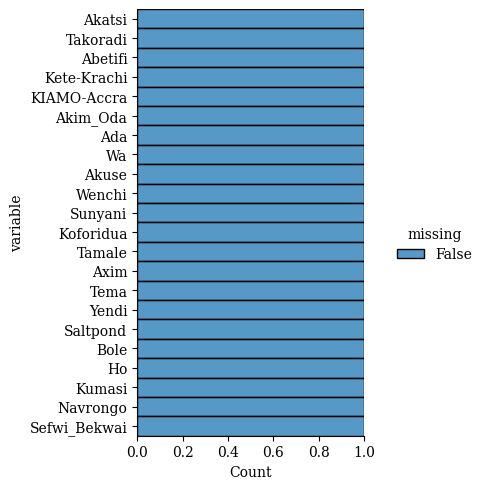

In [18]:
plt.figure(figsize=(18,10), dpi=80)
sns.displot(
    data=df_mon.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=0.8
)

In [20]:
combined_df.describe().T

count                 mean                  min  \
Date            15706  2001-07-01 12:00:00  1980-01-01 00:00:00   
Akatsi        15675.0             2.410475                  0.0   
Takoradi      15706.0             3.064409                  0.0   
Abetifi       15340.0             3.536904                  0.0   
Kete-Krachi   15429.0             3.607039                  0.0   
KIAMO-Accra   15639.0             2.101413                  0.0   
Akim_Oda      15157.0              3.87543                  0.0   
Ada           14577.0             2.157323                  0.0   
Wa            15065.0             2.785178                  0.0   
Akuse         15615.0             2.898706                  0.0   
Wenchi        15705.0             3.407036                  0.0   
Sunyani       15459.0             3.240598                  0.0   
Koforidua     15706.0              3.57741                  0.0   
Tamale        15706.0             2.942589                  0.0   
Axim          15706.0             5.188361                  0.0   
Tema          15675.0             1.868466                  0.0   
Yendi         15460.0             3.288939                  0.0   
Saltpond      14883.0              2.58931                  0.0   
Bole          15703.0             2.925919                  0.0   
Ho            15465.0             3.483298                  0.0   
Kumasi        15675.0               3.7074                  0.0   
Navrongo      15706.0             2.702203                  0.0   
Sefwi_Bekwai  15702.0             3.926315                  0.0   

                              25%                  50%                  75%  \
Date          1990-10-01 06:00:00  2001-07-01 12:00:00  2012-03-31 18:00:00   
Akatsi                        0.0                  0.0                  0.0   
Takoradi                      0.0                  0.0                  0.5   
Abetifi                       0.0                  0.0                  1.2   
Kete-Krachi                   0.0                  0.0                  0.3   
KIAMO-Accra                   0.0                  0.0                  0.0   
Akim_Oda                      0.0                  0.0                  2.0   
Ada                           0.0                  0.0                  0.0   
Wa                            0.0                  0.0                  0.0   
Akuse                         0.0                  0.0                  0.0   
Wenchi                        0.0                  0.0                  0.7   
Sunyani                       0.0                  0.0                  0.6   
Koforidua                     0.0                  0.0                  1.4   
Tamale                        0.0                  0.0                  0.0   
Axim                          0.0                  0.0                2.175   
Tema                          0.0                  0.0                  0.0   
Yendi                         0.0                  0.0                  0.2   
Saltpond                      0.0                  0.0                  0.0   
Bole                          0.0                  0.0                  0.0   
Ho                            0.0                  0.0                  0.8   
Kumasi                        0.0                  0.0                  1.1   
Navrongo                      0.0                  0.0                  0.0   
Sefwi_Bekwai                  0.0                  0.0                1.975   

                              max        std  
Date          2022-12-31 00:00:00        NaN  
Akatsi                      137.4   8.605477  
Takoradi                    191.5  10.752369  
Abetifi                     145.6   9.776735  
Kete-Krachi                 180.7  11.673885  
KIAMO-Accra                 243.9   9.091485  
Akim_Oda                    166.9   9.895573  
Ada                         205.7   8.856454  
Wa                          142.4     8.4688  
Akuse                       177.3   9.65

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import miceforest as mf
import random
import sklearn.neighbors._base 
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest
from sklearn.impute import KNNImputer

def impute_data(df_):
    '''
    This function `impute_data()` takes a DataFrame df_ as input, replaces 0.0 and -9999 with NaNs,
    and then performs MICE, Miss Forest, and KNN imputation techniques. 
    Finally, it returns the completed datasets for each imputation technique.
    '''
    # Replace 0.0 and -9999 with NaNs
    # df_.replace({0.0: np.nan, -9999: np.nan}, inplace=True)
    
    # Now, we will use each of the three techniques to impute data.
    
    # Create kernels.  #mice forest
    kernel = mf.ImputationKernel(
      data=df_.iloc[:,:],
      save_all_iterations=True,
      random_state=1343
    )
    print('Performing miceForest imputation ... \n') 
    kernel.mice(iterations=100, verbose=True)
    completed_dataset = kernel.complete_data(dataset=0, inplace=False)

    # Miss Forest
    imputer = MissForest(max_iter=100,
                        decreasing=False,
                        missing_values=np.nan,
                        copy=True,
                        n_estimators=100,
                        criterion=('squared_error', 'gini'),  # Changed from 'mse' to 'squared_error'
                        max_depth=None,
                        min_samples_split=3,
                        min_samples_leaf=1,
                        min_weight_fraction_leaf=0.0,
                        max_features='sqrt',          # ('sqrt', 'log2')
                        max_leaf_nodes=None,
                        min_impurity_decrease=0.0,
                        bootstrap=True,
                        oob_score=False,
                        n_jobs=-1,
                        random_state=None,
                        verbose=0,
                        warm_start=False,
                        class_weight=None) 
    print('Performing missForest imputation ... \n')   
    X_imputed_miss_forest = imputer.fit_transform(df_.iloc[:, :])
    X_imputed_miss_forest = pd.DataFrame(X_imputed_miss_forest, columns=df_.iloc[:, :].columns).round(1)

    print('Performing K-NN imputation ... \n') 
    impute = KNNImputer() 
    KNNImputed = impute.fit_transform(df_.iloc[:, :])
    KNNImputed = pd.DataFrame(KNNImputed, columns=df_.iloc[:, :].columns).round(1)
    
    return completed_dataset, X_imputed_miss_forest, KNNImputed

In [24]:
combined_df.head()

Date  Akatsi  Takoradi  Abetifi  Kete-Krachi  KIAMO-Accra  Akim_Oda  \
0 1980-01-01     0.0       0.0      NaN          0.0          0.0       0.0   
1 1980-01-02     0.0       0.0      NaN          0.0          0.0       0.0   
2 1980-01-03     0.0       0.0      NaN          0.0          0.0       0.0   
3 1980-01-04     0.0       0.0      NaN          0.0          0.0       0.0   
4 1980-01-05     0.0       0.0      NaN          0.0          0.0       0.0   

   Ada   Wa  Akuse  ...  Tamale  Axim  Tema  Yendi  Saltpond  Bole   Ho  \
0  0.0  0.0    0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0   
1  0.0  0.0    0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0   
2  0.0  0.0    0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0   
3  0.0  0.0    0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0   
4  0.0  0.0    0.0  ...     0.0   0.8   0.0    0.0       0.0   0.0  0.0   

   Kumasi  Navrongo  Sefwi_Bekwai  
0     0.0       0.0           0.0  
1     0.0       0.0           0.0  
2     0.0       0.0           0.0  
3     0.0       0.0           0.0  
4     0.0       0.0           0.0  

[5 rows x 23 columns]

In [26]:
combined_df.iloc[:, 1:].head()

Akatsi  Takoradi  Abetifi  Kete-Krachi  KIAMO-Accra  Akim_Oda  Ada   Wa  \
0     0.0       0.0      NaN          0.0          0.0       0.0  0.0  0.0   
1     0.0       0.0      NaN          0.0          0.0       0.0  0.0  0.0   
2     0.0       0.0      NaN          0.0          0.0       0.0  0.0  0.0   
3     0.0       0.0      NaN          0.0          0.0       0.0  0.0  0.0   
4     0.0       0.0      NaN          0.0          0.0       0.0  0.0  0.0   

   Akuse  Wenchi  ...  Tamale  Axim  Tema  Yendi  Saltpond  Bole   Ho  Kumasi  \
0    0.0     0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0     0.0   
1    0.0     0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0     0.0   
2    0.0     0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0     0.0   
3    0.0     0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0     0.0   
4    0.0     0.0  ...     0.0   0.8   0.0    0.0       0.0   0.0  0.0     0.0   

   Navrongo  Sefwi_Bekwai  
0       0.0           0.0  
1       0.0           0.0  
2       0.0           0.0  
3       0.0           0.0  
4       0.0           0.0  

[5 rows x 22 columns]

In [27]:
mice_df, miss_df, knn_df = impute_data(df_=combined_df.iloc[:, 1:])
# Add dataframes element-wise
sum_of_dataframes = mice_df + miss_df + knn_df
# Calculate the element-wise average
elementwise_avg = sum_of_dataframes / 3

Performing miceForest imputation ... 

Initialized logger with name mice 1-100
Dataset 0
1  | Wenchi | Bole | Sefwi_Bekwai | Kumasi | Tema | Akatsi | KIAMO-Accra | Akuse | Ho | Yendi | Sunyani | Kete-Krachi | Abetifi | Akim_Oda | Wa | Saltpond | Ada
2  | Wenchi | Bole | Sefwi_Bekwai | Kumasi | Tema | Akatsi | KIAMO-Accra | Akuse | Ho | Yendi | Sunyani | Kete-Krachi | Abetifi | Akim_Oda | Wa | Saltpond | Ada
3  | Wenchi | Bole | Sefwi_Bekwai | Kumasi | Tema | Akatsi | KIAMO-Accra | Akuse | Ho | Yendi | Sunyani | Kete-Krachi | Abetifi | Akim_Oda | Wa | Saltpond | Ada
4  | Wenchi | Bole | Sefwi_Bekwai | Kumasi | Tema | Akatsi | KIAMO-Accra | Akuse | Ho | Yendi | Sunyani | Kete-Krachi | Abetifi | Akim_Oda | Wa | Saltpond | Ada
5  | Wenchi | Bole | Sefwi_Bekwai | Kumasi | Tema | Akatsi | KIAMO-Accra | Akuse | Ho | Yendi | Sunyani | Kete-Krachi | Abetifi | Akim_Oda | Wa | Saltpond | Ada
6  | Wenchi | Bole | Sefwi_Bekwai | Kumasi | Tema | Akatsi | KIAMO-Accra | Akuse | Ho | Yendi | Sunyani | 

Columns with NaNs: ['Akatsi', 'Abetifi', 'Kete-Krachi', 'KIAMO-Accra', 'Akim_Oda', 'Ada', 'Wa', 'Akuse', 'Wenchi', 'Sunyani', 'Tema', 'Yendi', 'Saltpond', 'Bole', 'Ho', 'Kumasi', 'Sefwi_Bekwai']
0 0
1 0
2 0
3 0


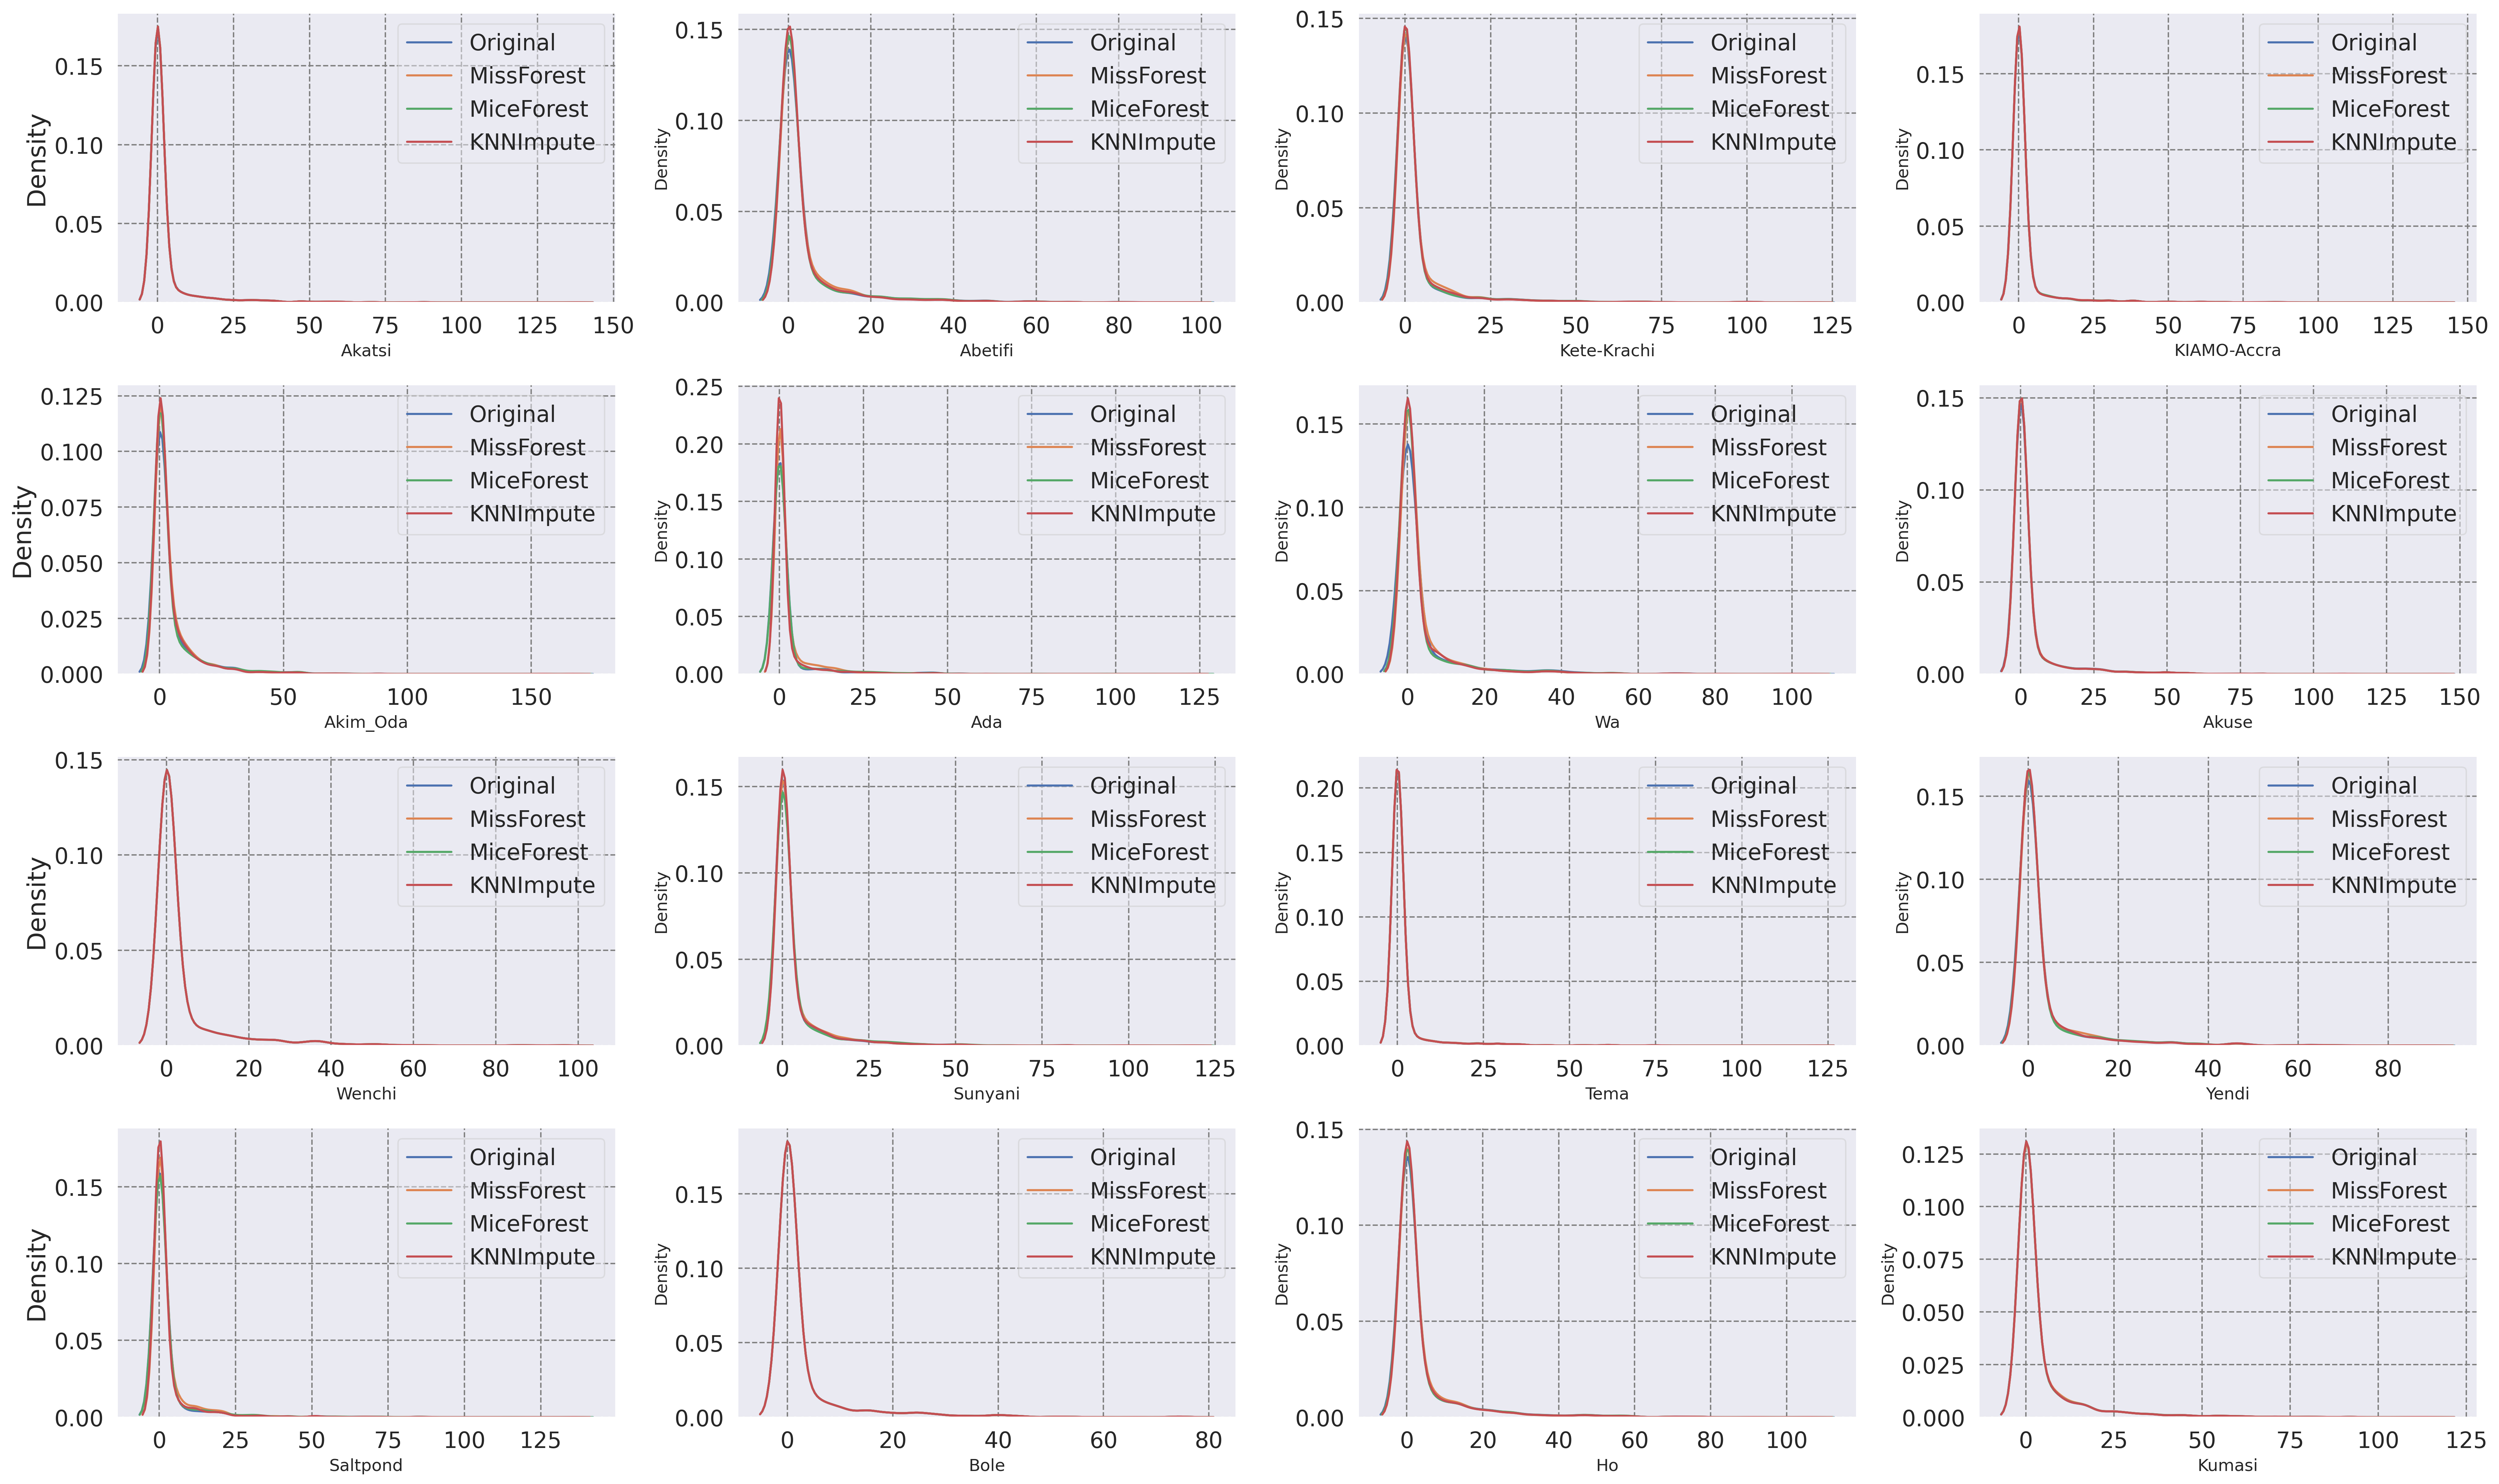

In [28]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df, miss_df, mice_df, knn_df, directory_path, and plot_prefix are already defined
sns.set(style='darkgrid')

df1 = combined_df.iloc[:, 1:].copy()
# List the columns with NaN values in the DataFrame
columns_with_nans = df1.columns[df1.isnull().any()].tolist()
print("Columns with NaNs:", columns_with_nans)

# Determine the number of rows and columns needed
cols = 4
num_columns = len(columns_with_nans[:-1])
num_rows = math.ceil(num_columns / cols)  # Assuming you want 4 columns per row

fig, ax = plt.subplots(figsize=(25, 15), nrows=num_rows, ncols=cols, dpi=300)

# Loop through columns with NaNs
for idx, col in enumerate(columns_with_nans[:-1]):
    i = idx // cols  # Calculate the row index
    j = idx % cols   # Calculate the column index
    
    sns.kdeplot(x=df1[col][df1.iloc[:, :].isnull().any(axis=1)], label='Original', ax=ax[i][j])
    sns.kdeplot(x=miss_df[col][df1.iloc[:, :].isnull().any(axis=1)], label='MissForest', ax=ax[i][j])
    sns.kdeplot(x=mice_df[col][df1.iloc[:, :].isnull().any(axis=1)], label='MiceForest', ax=ax[i][j])
    sns.kdeplot(x=knn_df[col][df1.iloc[:, :].isnull().any(axis=1)], label='KNNImpute', ax=ax[i][j])

    # Add grid with light-dark dashes
    ax[i][j].grid(True, linestyle='--', color='grey')

    # Make x and y axis lines visible
    ax[i][j].spines['bottom'].set_visible(True)
    ax[i][j].spines['left'].set_visible(True)

    # Add y-axis label only to the first column subplots (0,0), (1,0), (2,0), and (3,0)
    if j == 0:
        print(i, j)
        ax[i][j].set_ylabel('Density', fontsize=18)

    # Transparent legend
    leg = ax[i][j].legend(fontsize=16)
    leg.get_frame().set_alpha(0.5)  # Set the legend background to be transparent

    # Increase size of ticks and labels
    ax[i][j].tick_params(axis='both', which='major', labelsize=16)

# Adjust layout to avoid overlap
fig.tight_layout()

plot_prefix = 'fill_in_gaps'
directory_path = f'{output_dir}'
# Save the figure in both PDF and PNG formats
for ext in ['pdf', 'png']:
    plt.savefig(directory_path + '/' + f'{plot_prefix}.{ext}', 
                bbox_inches='tight',   # Trim the white spaces around the figure
                pad_inches=0.1,        # Padding between the figure and the edges
                format=ext,            # Save as the current extension
                dpi=300 if ext == 'png' else None,  # Set DPI only for PNG format
                transparent=True)

plt.show()


In [30]:
elementwise_avg.head()

Akatsi  Takoradi   Abetifi  Kete-Krachi  KIAMO-Accra  Akim_Oda  Ada   Wa  \
0     0.0       0.0  0.033333          0.0          0.0       0.0  0.0  0.0   
1     0.0       0.0  0.033333          0.0          0.0       0.0  0.0  0.0   
2     0.0       0.0  0.033333          0.0          0.0       0.0  0.0  0.0   
3     0.0       0.0  0.033333          0.0          0.0       0.0  0.0  0.0   
4     0.0       0.0  0.000000          0.0          0.0       0.0  0.0  0.0   

   Akuse  Wenchi  ...  Tamale  Axim  Tema  Yendi  Saltpond  Bole   Ho  Kumasi  \
0    0.0     0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0     0.0   
1    0.0     0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0     0.0   
2    0.0     0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0     0.0   
3    0.0     0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0     0.0   
4    0.0     0.0  ...     0.0   0.8   0.0    0.0       0.0   0.0  0.0     0.0   

   Navrongo  Sefwi_Bekwai  
0       0.0           0.0  
1       0.0           0.0  
2       0.0           0.0  
3       0.0           0.0  
4       0.0           0.0  

[5 rows x 22 columns]

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# Load your daily rainfall data
# Make sure your data has a 'Date' column and weather station columns with rainfall values
# data = pd.read_csv('rainfall_data.csv')
# data = pd.DataFrame()

data = elementwise_avg.copy()
data['Date'] = combined_df['Date'].values

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as the index
data.set_index('Date', inplace=True)

# Resample data to different durations (e.g., daily, weekly, monthly)
# Here, we can calculate daily maximum rainfall for each station
daily_max = data.resample('M').max()
# print(daily_max)

# Function to calculate return periods
def return_period(intensity, n, r):
    return (n + 1) / (r + 1)  # Simple return period formula

# Analyze intensity for different durations
durations = [1, 2, 3]  # 1 day, 2 days, 3 days, etc. 
return_periods = [2, 5, 10, 25]  # Example return periods (years)

# Initialize a DataFrame to hold IDF values
idf_values = pd.DataFrame()

for duration in durations:
    # Extract the maximum rainfall for each duration
    max_rainfall = daily_max.rolling(window=duration).max()
    for rp in return_periods:
        # Calculate frequency of exceedance and return periods
        intensity = max_rainfall[max_rainfall > 0].dropna()  # Keep only non-zero values
        n = len(intensity)  # Number of observations
        r = (intensity.rank() / n).values  # Rank of the intensities
        rp_values = return_period(intensity, n, r)  # Calculate return periods

        # Store in IDF DataFrame
        idf_values = pd.concat([idf_values, pd.DataFrame({
            'Duration (days)': duration,
            'Return Period (years)': rp,
            'Intensity (mm/h)': intensity
        })])

# Plotting IDF curves
plt.figure(figsize=(10, 6))
for rp in return_periods:
    subset = idf_values[idf_values['Return Period (years)'] == rp]
    plt.plot(subset['Duration (days)'], subset['Intensity (mm/h)'], marker='o', label=f'RP: {rp} years')

plt.title('Rainfall Intensity-Duration-Frequency (IDF) Curves')
plt.xlabel('Duration (days)')
plt.ylabel('Intensity (mm/h)')
plt.legend()
plt.grid()
plt.show()


ValueError: If using all scalar values, you must pass an index

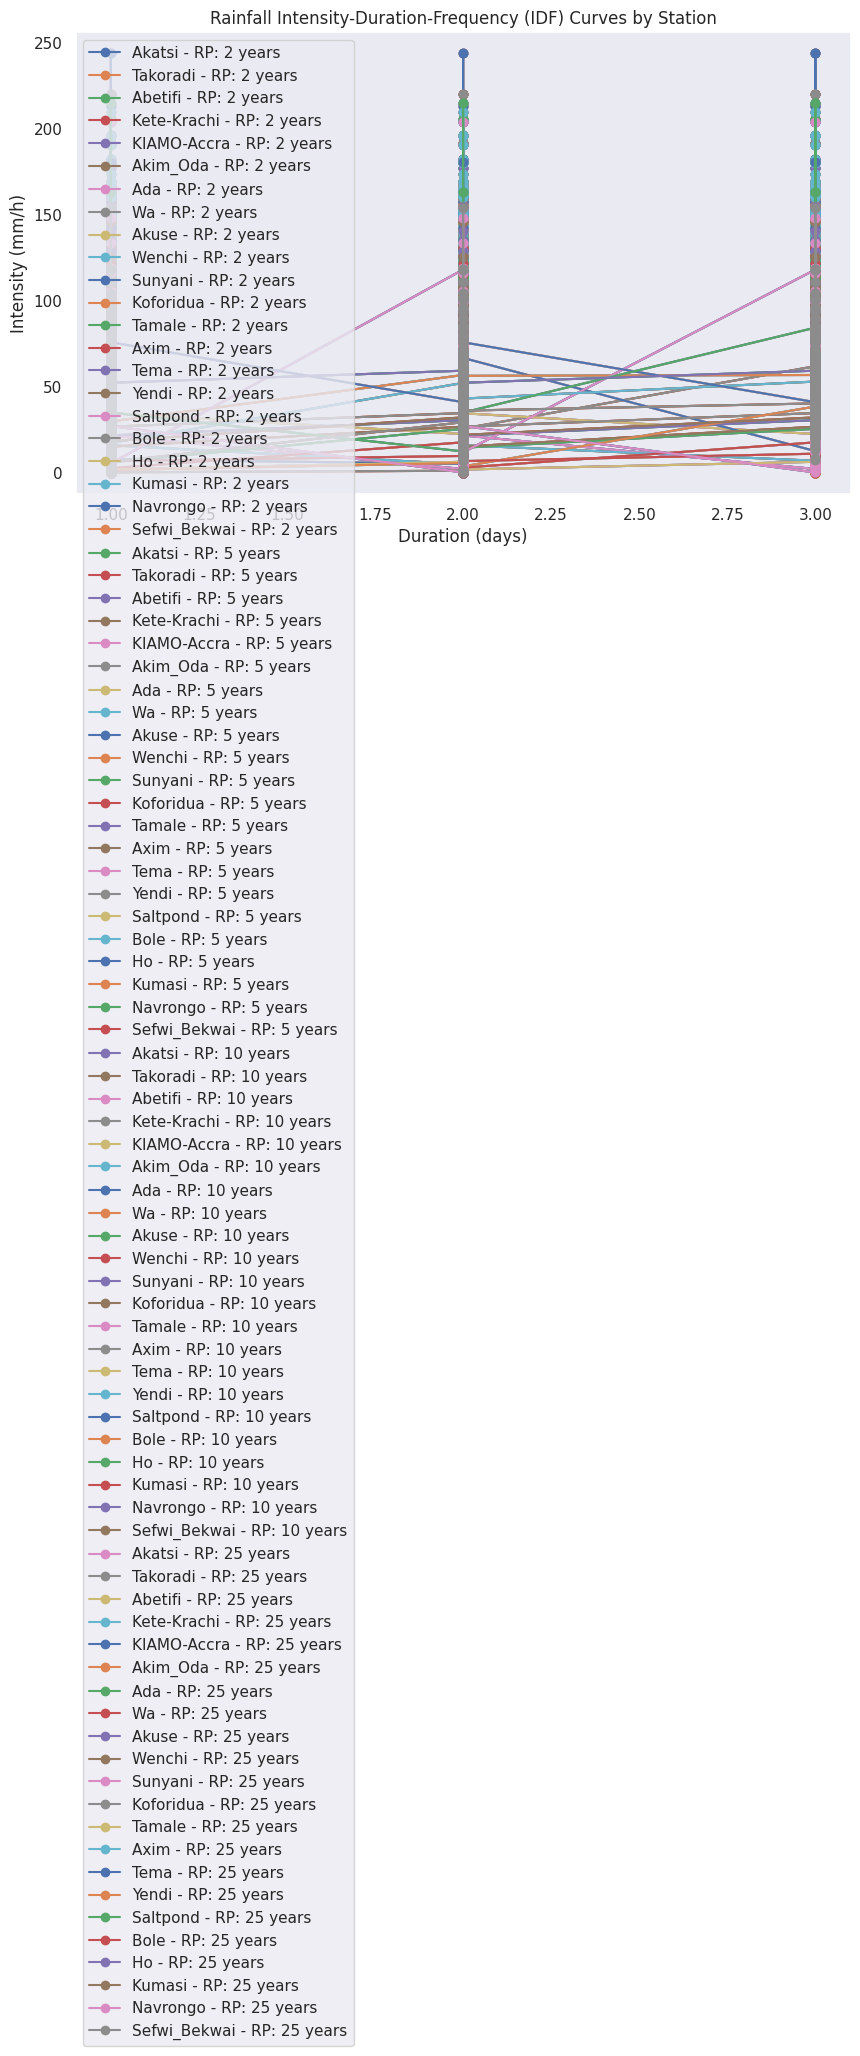

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# Load your daily rainfall data
# data = pd.read_csv('rainfall_data.csv')

# Assuming `elementwise_avg` and `combined_df` exist as in your initial setup
# Initialize data
data = elementwise_avg.copy()
data['Date'] = combined_df['Date'].values

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as the index
data.set_index('Date', inplace=True)

# Resample data to monthly maximum rainfall
daily_max = data.resample('M').max()

# Function to calculate return periods
def return_period(n, r):
    return (n + 1) / (r + 1)

# Analyze intensity for different durations
durations = [1, 2, 3]  # 1 day, 2 days, 3 days, etc.
return_periods = [2, 5, 10, 25]  # Example return periods (years)

# Initialize a DataFrame to hold IDF values
idf_values = pd.DataFrame()

for station in daily_max.columns:
    for duration in durations:
        # Calculate the rolling maximum rainfall for each duration for the station
        max_rainfall = daily_max[station].rolling(window=duration).max()
        
        for rp in return_periods:
            # Filter for non-zero maximum rainfall values
            intensity = max_rainfall[max_rainfall > 0].dropna()
            
            if len(intensity) > 0:  # Proceed only if intensity is non-empty
                n = len(intensity)
                r = (intensity.rank() / n).values  # Rank of intensities
                
                # Calculate return periods
                rp_values = return_period(n, r)
                
                # Create DataFrame for the current duration, return period, and station
                temp_df = pd.DataFrame({
                    'Station': np.repeat(station, len(intensity)),
                    'Duration (days)': np.repeat(duration, len(intensity)),
                    'Return Period (years)': np.repeat(rp, len(intensity)),
                    'Intensity (mm/h)': intensity.values.flatten()
                })
                
                # Append to IDF DataFrame
                idf_values = pd.concat([idf_values, temp_df], ignore_index=True)

# Plotting IDF curves for each station
plt.figure(figsize=(10, 6))
for rp in return_periods:
    subset = idf_values[idf_values['Return Period (years)'] == rp]
    for station in daily_max.columns:
        station_data = subset[subset['Station'] == station]
        plt.plot(station_data['Duration (days)'], station_data['Intensity (mm/h)'], marker='o', label=f'{station} - RP: {rp} years')

plt.title('Rainfall Intensity-Duration-Frequency (IDF) Curves by Station')
plt.xlabel('Duration (days)')
plt.ylabel('Intensity (mm/h)')
plt.legend()
plt.grid()
plt.show()


In [38]:
duration

1

In [39]:
daily_max.rolling(window=duration).max()

Akatsi  Takoradi    Abetifi  Kete-Krachi  KIAMO-Accra  Akim_Oda  \
Date                                                                          
1980-01-31     0.0       0.3   4.533333          0.0          0.0      12.5   
1980-02-29     0.0       1.3  22.600000          5.1          5.3      56.9   
1980-03-31     0.0      62.0   8.166667          7.1         12.7      40.6   
1980-04-30     2.3      90.9  28.166667         15.2         85.3      31.2   
1980-05-31    10.7      86.1  27.766667         53.3         61.7      38.3   
...            ...       ...        ...          ...          ...       ...   
2022-08-31    56.9       7.1  21.700000         41.6         18.6      30.4   
2022-09-30    88.0       8.2  83.700000         42.8         36.5      46.5   
2022-10-31    46.8      28.9  25.600000         16.1         28.3      50.4   
2022-11-30     6.8      25.8  31.000000          0.0         66.8      56.4   
2022-12-31    21.8       0.4  34.700000          0.0          7.9      29.9   

                  Ada         Wa  Akuse  Wenchi  ...  Tamale   Axim   Tema  \
Date                                             ...                         
1980-01-31   0.000000  17.800000    0.3    26.9  ...     6.5   52.3    0.0   
1980-02-29  25.600000   4.500000   30.7    18.3  ...     0.0   16.8   41.1   
1980-03-31  12.200000   6.300000   30.7    15.2  ...     0.3   53.1   35.8   
1980-04-30  47.000000  47.200000   30.7    51.6  ...    37.0   47.5  121.9   
1980-05-31  54.700000  36.600000   55.1    59.7  ...    22.8  100.3   59.5   
...               ...        ...    ...     ...  ...     ...    ...    ...   
2022-08-31  11.733333  80.500000   49.5    49.9  ...   141.2   59.4    8.7   
2022-09-30  18.533333  98.500000   41.7    44.0  ...    47.5   22.8   11.6   
2022-10-31  28.600000  12.300000  141.5    97.1  ...    25.7   56.2   25.7   
2022-11-30  14.666667   3.100000   19.1    15.3  ...     2.0   43.2   75.9   
2022-12-31   6.200000   2.766667   21.8     0.0  ...     0.0   17.4    0.0   

                Yendi  Saltpond  Bole         Ho  Kumasi  Navrongo  \
Date                                                                 
1980-01-31   5.800000       0.4   4.6   6.900000     2.5       0.0   
1980-02-29   0.000000      12.5   9.9  59.400000    32.3       0.0   
1980-03-31  38.600000      84.4  11.2  22.600000    17.8       0.3   
1980-04-30  21.300000      30.6  28.4  52.800000    23.3      51.6   
1980-05-31  23.600000      73.0  39.6  70.400000    33.8      55.9   
...               ...       ...   ...        ...     ...       ...   
2022-08-31  39.333333      17.9  53.7  26.000000    24.2      52.8   
2022-09-30  24.633333      29.0  73.9  36.900000    91.5      99.0   
2022-10-31  16.900000      39.8  21.2  15.133333    19.2      27.3   
2022-11-30   3.833333      35.1   2.3   8.300000    22.1       0.0   
2022-12-31   1.700000       0.0   6.9  52.400000    18.5       0.0   

            Sefwi_Bekwai  
Date                      
1980-01-31          11.4  
1980-02-29          29.5  
1980-03-31          40.4  
1980-04-30          24.4  
1980-05-31          50.3  
...                  ...  
2022-08-31          39.2  
2022-09-30          26.9  
2022-10-31          75.9  
2022-11-30          36.2  
2022-12-31           6.4  

[516 rows x 22 columns]

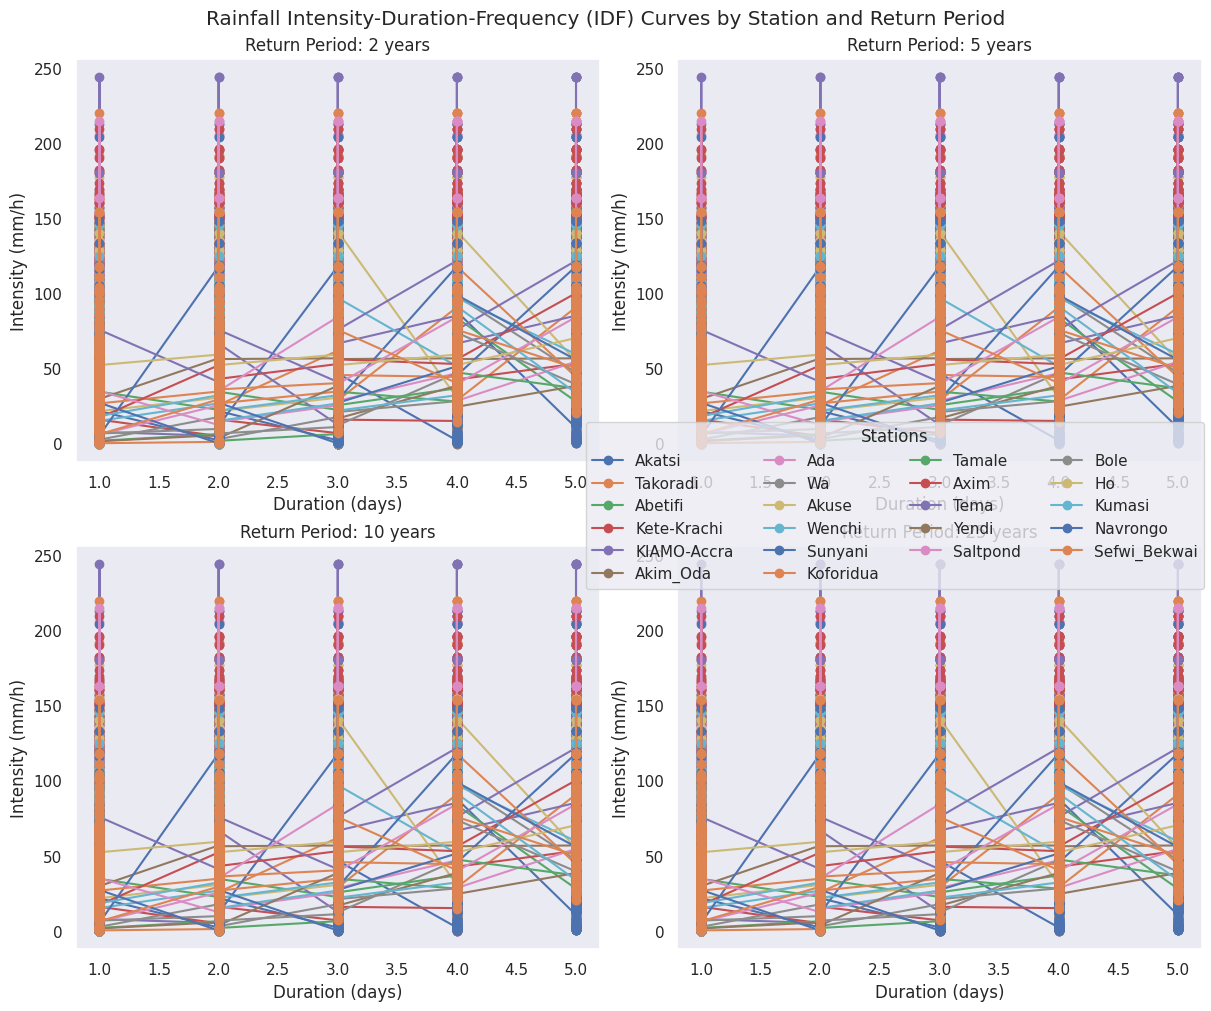

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# Initialize data
data = elementwise_avg.copy()
data['Date'] = combined_df['Date'].values

# Convert the 'Date' column to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Resample data to monthly maximum rainfall
daily_max = data.resample('M').max()

# Function to calculate return periods
def return_period(n, r):
    return (n + 1) / (r + 1)

# Define durations and return periods
durations = [1, 2, 3, 4, 5]  # Days
return_periods = [2, 5, 10, 25]  # Years

# Initialize a DataFrame to hold IDF values
idf_values = pd.DataFrame()

for station in daily_max.columns:
    for duration in durations:
        max_rainfall = daily_max[station].rolling(window=duration).max()
        
        for rp in return_periods:
            intensity = max_rainfall[max_rainfall > 0].dropna()
            if len(intensity) > 0:
                n = len(intensity)
                r = (intensity.rank() / n).values
                rp_values = return_period(n, r)

                temp_df = pd.DataFrame({
                    'Station': np.repeat(station, len(intensity)),
                    'Duration (days)': np.repeat(duration, len(intensity)),
                    'Return Period (years)': np.repeat(rp, len(intensity)),
                    'Intensity (mm/h)': intensity.values.flatten()
                })
                
                idf_values = pd.concat([idf_values, temp_df], ignore_index=True)

# Set up the 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)
axs = axs.flatten()  # Flatten to easily index each subplot

# Plot each return period on a separate subplot
for idx, rp in enumerate(return_periods):
    ax = axs[idx]
    subset = idf_values[idf_values['Return Period (years)'] == rp]

    for station in daily_max.columns:
        station_data = subset[subset['Station'] == station]
        ax.plot(
            station_data['Duration (days)'],
            station_data['Intensity (mm/h)'],
            marker='o',
            label=station
        )
    
    # Add subplot-specific labels and titles
    ax.set_title(f'Return Period: {rp} years')
    ax.set_xlabel('Duration (days)')
    ax.set_ylabel('Intensity (mm/h)')
    ax.grid()

# Configure a shared legend with multiple columns outside the plot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', ncol=4, title='Stations')

# Add a main title for the figure
plt.suptitle('Rainfall Intensity-Duration-Frequency (IDF) Curves by Station and Return Period')
plt.show()


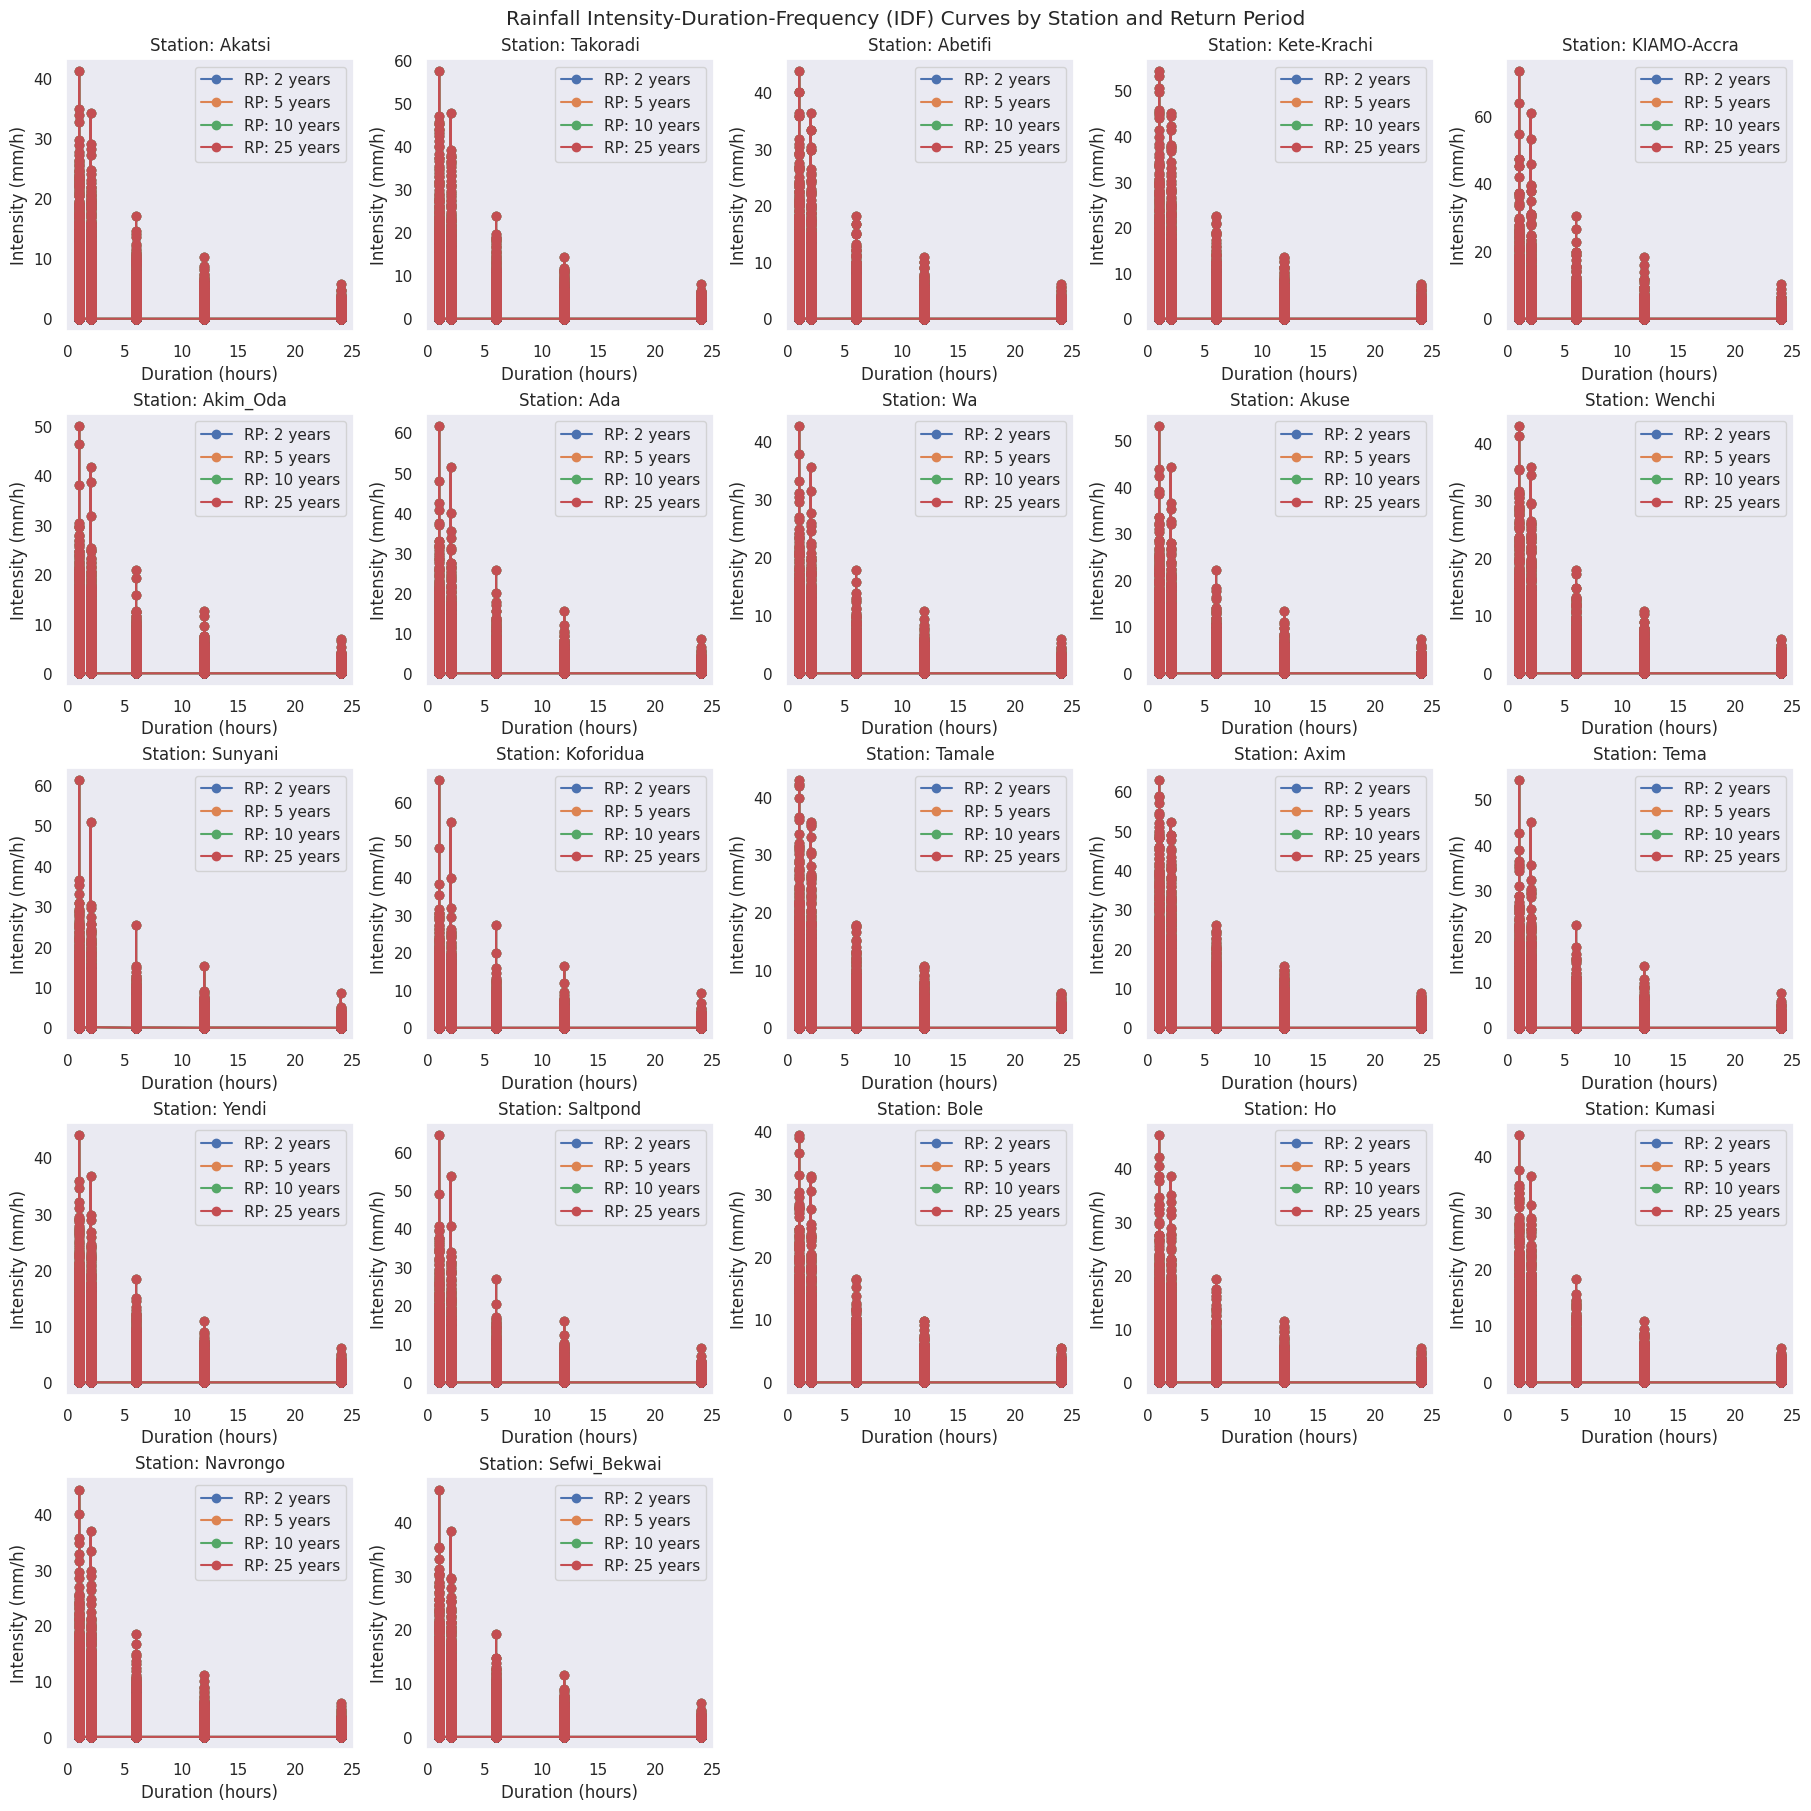

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# Initialize data
data = elementwise_avg.copy()
data['Date'] = combined_df['Date'].values
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Assuming daily max rainfall is equivalent to 24-hour duration
daily_max = data.resample('D').max()

# Return periods and duration scaling factors
return_periods = [2, 5, 10, 25]  # Example return periods
durations_hours = [1, 2, 6, 12, 24]  # Durations in hours
scaling_factors = {1: 0.3, 2: 0.5, 6: 0.75, 12: 0.9, 24: 1.0}  # Approximate scaling factors

# Initialize DataFrame for IDF values
idf_values = pd.DataFrame()

for station in daily_max.columns:
    for rp in return_periods:
        max_rainfall = daily_max[station].dropna()  # Daily max for each station
        
        # Calculate the intensity for different durations
        for duration in durations_hours:
            factor = scaling_factors[duration]
            scaled_intensity = max_rainfall * factor  # Scale daily values

            # Create DataFrame entries for IDF values
            temp_df = pd.DataFrame({
                'Station': np.repeat(station, len(scaled_intensity)),
                'Duration (hours)': np.repeat(duration, len(scaled_intensity)),
                'Return Period (years)': np.repeat(rp, len(scaled_intensity)),
                'Intensity (mm/h)': (scaled_intensity / duration).values.flatten()
            })
            idf_values = pd.concat([idf_values, temp_df], ignore_index=True)

# Set up 5x5 subplot layout (with some extra empty subplots)
fig, axs = plt.subplots(5, 5, figsize=(18, 18), constrained_layout=True)
axs = axs.flatten()

# Plot for each station
for idx, station in enumerate(daily_max.columns):
    ax = axs[idx]
    subset = idf_values[idf_values['Station'] == station]
    
    for rp in return_periods:
        rp_subset = subset[subset['Return Period (years)'] == rp]
        ax.plot(
            rp_subset['Duration (hours)'],
            rp_subset['Intensity (mm/h)'],
            marker='o',
            label=f'RP: {rp} years'
        )

    # Subplot-specific titles and labels
    ax.set_title(f'Station: {station}')
    ax.set_xlabel('Duration (hours)')
    ax.set_ylabel('Intensity (mm/h)')
    ax.grid()
    ax.legend(loc='upper right')

# Hide remaining unused subplots
for j in range(len(daily_max.columns), len(axs)):
    axs[j].axis('off')

# Main title for figure
plt.suptitle('Rainfall Intensity-Duration-Frequency (IDF) Curves by Station and Return Period')
plt.show()


In [1]:
### Survival Analysis Lecture

In [52]:
# import numpy as np

# # Log-likelihood function for Weibull with censoring
# def log_likelihood(t, c, rho, kappa):
#     term1 = c * (np.log(kappa) + np.log(rho) + (kappa - 1) * np.log(rho * t))
#     term2 = - (rho * t) ** kappa
#     return np.sum(term1 + term2)

# # First derivatives
# def first_derivatives(t, c, rho, kappa):
#     dL_drho = np.sum(c / rho - kappa * (t ** kappa))
#     dL_dkappa = np.sum((c / kappa) + c * np.log(rho * t) - (rho * t) ** kappa * np.log(t))
#     return dL_drho, dL_dkappa

# # Second derivatives
# def second_derivatives(t, c, rho, kappa):
#     d2L_drho2 = - np.sum(c / rho ** 2)
#     d2L_dkappa2 = -np.sum(c / kappa ** 2 + (rho * t) ** kappa * (np.log(t) ** 2))
#     d2L_drh_dkap = np.sum(- t ** kappa * np.log(t))
#     return d2L_drho2, d2L_dkappa2, d2L_drh_dkap

# # Modified Newton-Raphson method with scaling and backup gradient descent
# def optimize_weibull_mle(t, c, rho_init, kappa_init, tol=1e-5, max_iter=100, use_gradient_descent=True):
#     # Scale data to improve numerical stability
#     t = t / np.max(t)
#     log_rho, log_kappa = np.log(rho_init), np.log(kappa_init)
    
#     for i in range(max_iter):
#         rho, kappa = np.exp(log_rho), np.exp(log_kappa)
        
#         # Calculate derivatives
#         dL_drho, dL_dkappa = first_derivatives(t, c, rho, kappa)
#         d2L_drho2, d2L_dkappa2, d2L_drh_dkap = second_derivatives(t, c, rho, kappa)
        
#         # Form gradient and Hessian in log-space
#         gradient = np.array([dL_drho * rho, dL_dkappa * kappa])  # Chain rule
#         hessian = np.array([
#             [d2L_drho2 * rho**2 + dL_drho * rho, d2L_drh_dkap * rho * kappa],
#             [d2L_drh_dkap * rho * kappa, d2L_dkappa2 * kappa**2 + dL_dkappa * kappa]
#         ])
        
#         # Newton-Raphson step or gradient descent if Hessian is singular
#         try:
#             delta = np.linalg.solve(hessian, gradient)
#         except np.linalg.LinAlgError:
#             if not use_gradient_descent:
#                 print("Hessian is singular. Try with gradient descent enabled.")
#                 return np.exp(log_rho), np.exp(log_kappa)
#             delta = 0.01 * gradient  # Small step for gradient descent

#         # Update parameters in log-space for positive constraint
#         log_rho_new, log_kappa_new = log_rho - 0.1 * delta[0], log_kappa - 0.1 * delta[1]
        
#         # Check for convergence
#         if np.abs(log_rho_new - log_rho) < tol and np.abs(log_kappa_new - log_kappa) < tol:
#             print(f"Converged in {i+1} iterations.")
#             return np.exp(log_rho_new), np.exp(log_kappa_new)
        
#         # Apply updates
#         log_rho, log_kappa = log_rho_new, log_kappa_new
    
#     print("Max iterations reached without convergence.")
#     return np.exp(log_rho), np.exp(log_kappa)

# # Example data
# t = np.array([5, 10, 15, 20, 25])  # observed times
# c = np.array([1, 1, 1, 0, 1])  # censoring indicators

# # Initial guesses for parameters
# rho_init = 0.5
# kappa_init = 1.5

# # Estimate parameters using the improved method
# rho_est, kappa_est = optimize_weibull_mle(t, c, rho_init, kappa_init)
# print(f"Estimated rho: {rho_est}, Estimated kappa: {kappa_est}")


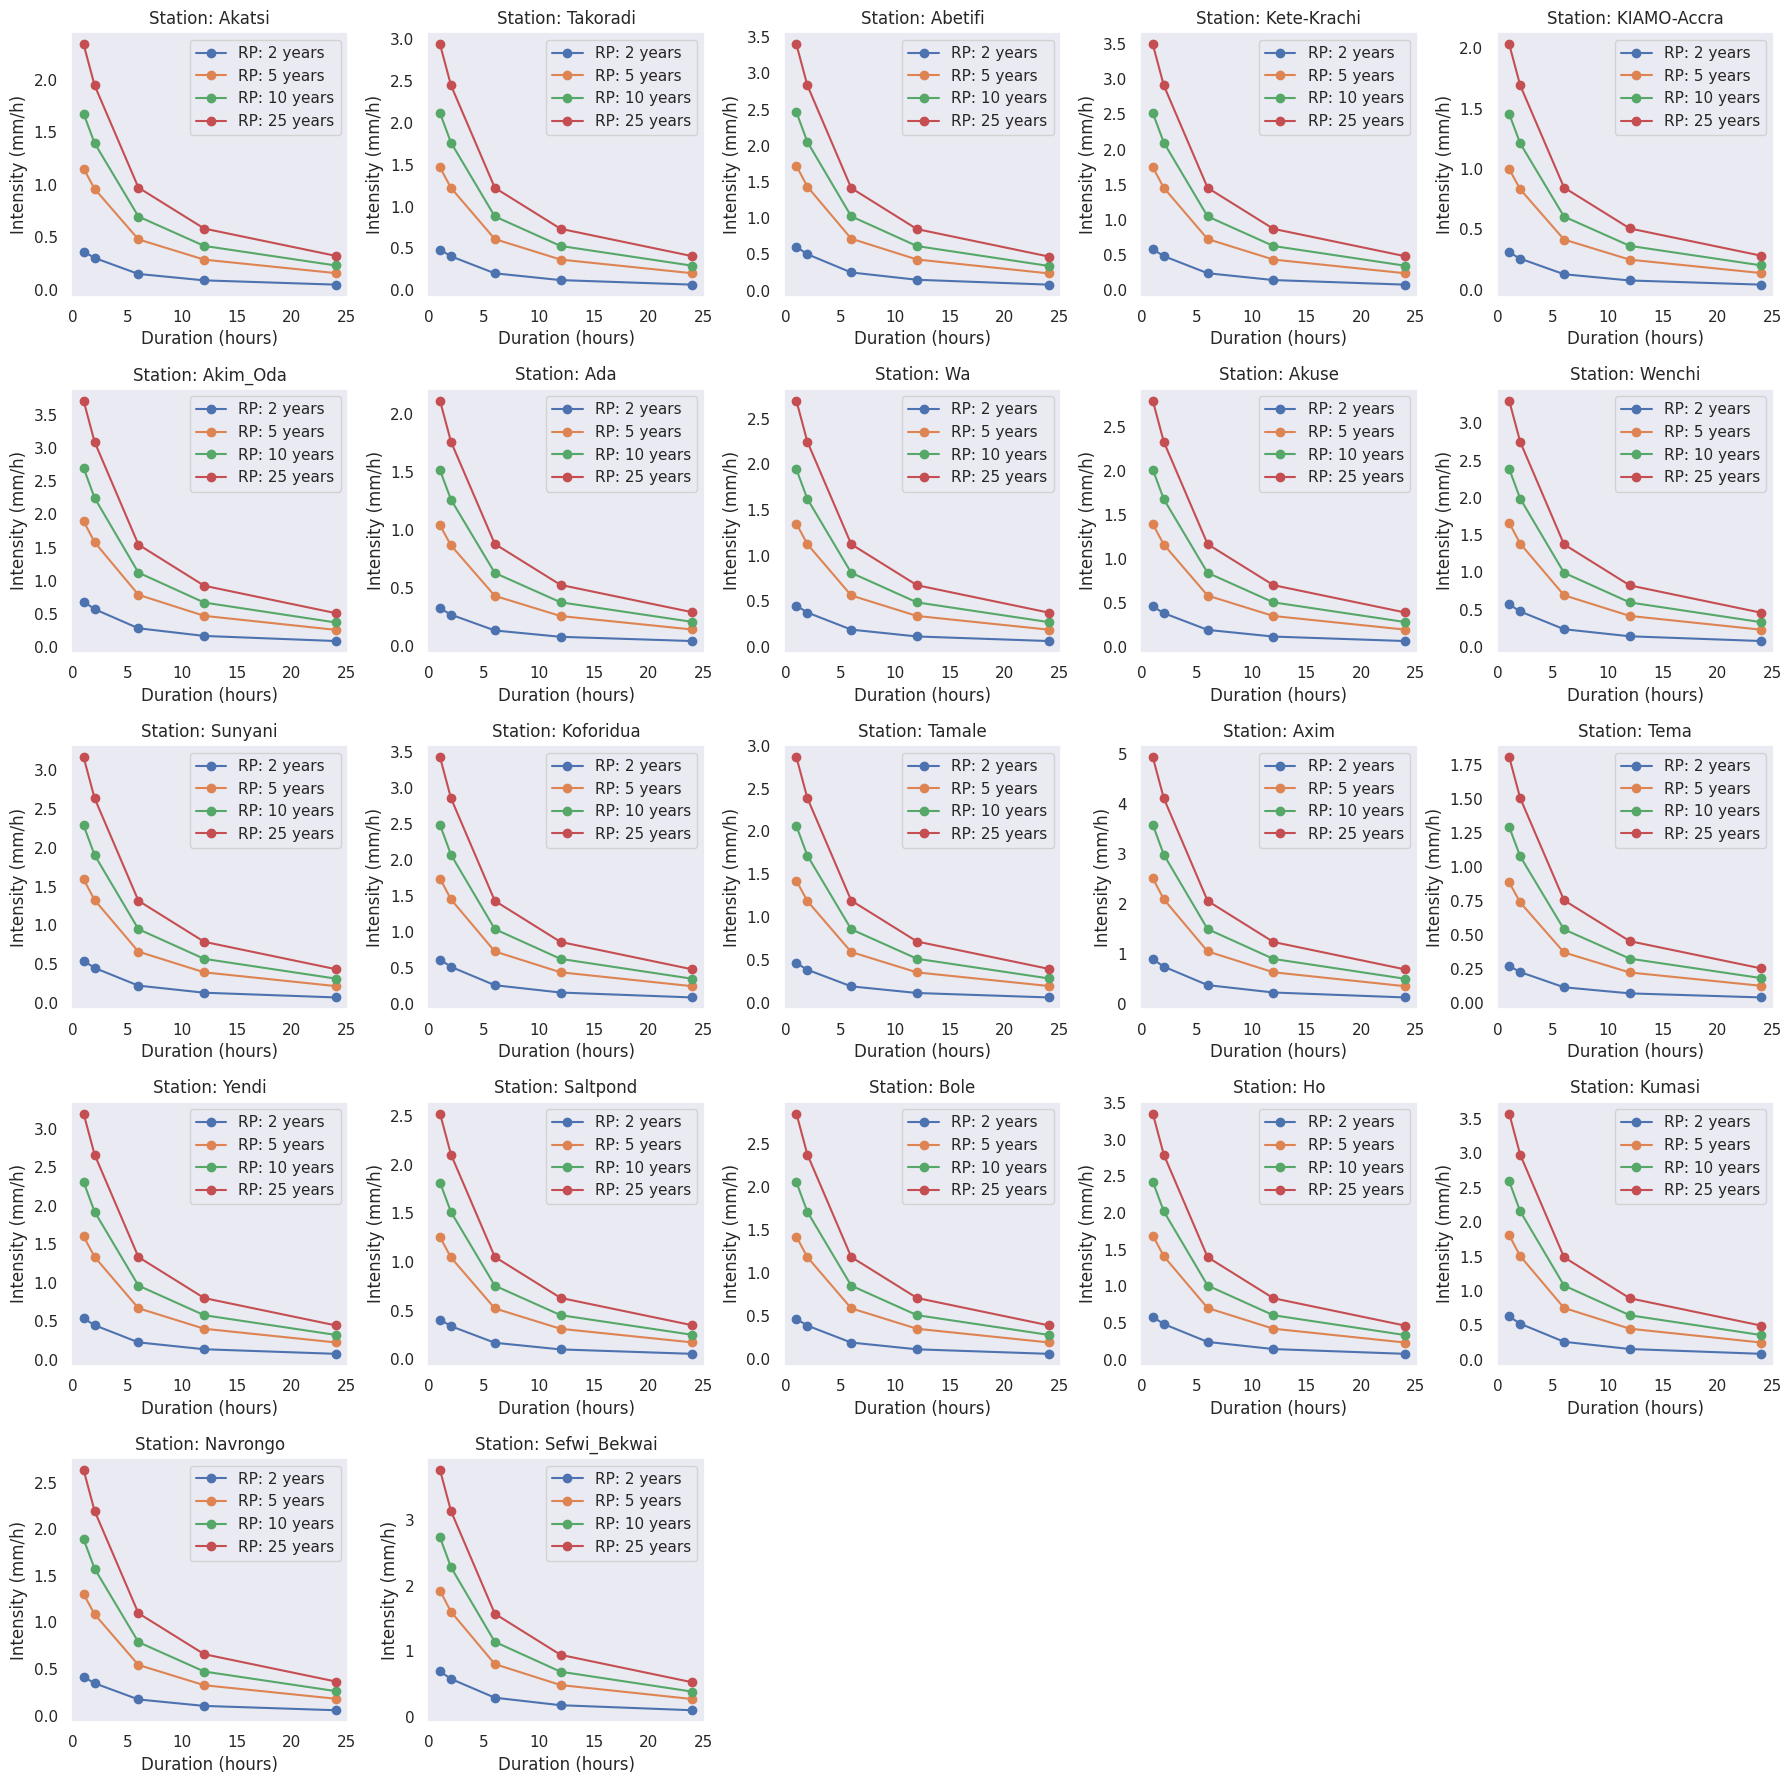

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

# Initialize data
data = elementwise_avg.copy()
data['Date'] = combined_df['Date'].values
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Assuming daily max rainfall is equivalent to 24-hour duration
daily_max = data.resample('D').max()

# Define return periods, durations, and scaling factors
return_periods = [2, 5, 10, 25]  # Return periods in years
durations_hours = [1, 2, 6, 12, 24]  # Durations in hours
scaling_factors = {1: 0.3, 2: 0.5, 6: 0.75, 12: 0.9, 24: 1.0}  # Approximate scaling factors

# Initialize DataFrame for IDF values
idf_values = pd.DataFrame()

for station in daily_max.columns:
    max_rainfall = daily_max[station].dropna()  # Daily max rainfall per station
    
    # Fit Gumbel distribution
    loc, scale = gumbel_r.fit(max_rainfall)
    
    for rp in return_periods:
        # Calculate return level for each return period
        return_level = gumbel_r.ppf(1 - 1/rp, loc=loc, scale=scale)
        
        for duration in durations_hours:
            factor = scaling_factors[duration]
            scaled_intensity = return_level * factor  # Scale daily values for duration
            
            # Add IDF data for each station, return period, and duration
            temp_df = pd.DataFrame({
                'Station': [station],
                'Duration (hours)': [duration],
                'Return Period (years)': [rp],
                'Intensity (mm/h)': [scaled_intensity / duration]
            })
            idf_values = pd.concat([idf_values, temp_df], ignore_index=True)

# Plotting IDF curves
fig, axs = plt.subplots(5, 5, figsize=(18, 18), constrained_layout=True)
axs = axs.flatten()

for idx, station in enumerate(daily_max.columns):
    ax = axs[idx]
    subset = idf_values[idf_values['Station'] == station]
    
    for rp in return_periods:
        rp_subset = subset[subset['Return Period (years)'] == rp]
        ax.plot(
            rp_subset['Duration (hours)'],
            rp_subset['Intensity (mm/h)'],
            marker='o',
            label=f'RP: {rp} years'
        )
    
    ax.set_title(f'Station: {station}')
    ax.set_xlabel('Duration (hours)')
    ax.set_ylabel('Intensity (mm/h)')
    ax.grid()
    ax.legend(loc='upper right', ncol=1)  # Adjusted legend layout

# Hide any unused subplots
for j in range(len(daily_max.columns), len(axs)):
    axs[j].axis('off')
    
# Adjust layout to avoid overlap
fig.tight_layout()

plot_prefix = 'IDF_curves_per_station'
directory_path = f'{output_dir}'
# Save the figure in both PDF and PNG formats
for ext in ['pdf', 'png']:
    plt.savefig(directory_path + '/' + f'{plot_prefix}.{ext}', 
                bbox_inches='tight',   # Trim the white spaces around the figure
                pad_inches=0.1,        # Padding between the figure and the edges
                format=ext,            # Save as the current extension
                dpi=300 if ext == 'png' else None,  # Set DPI only for PNG format
                transparent=False)


# Main title
# plt.suptitle('Rainfall Intensity-Duration-Frequency (IDF) Curves by Station and Return Period')
plt.show()


# cluster analysis

In [58]:
combined_df.head()

Date  Akatsi  Takoradi  Abetifi  Kete-Krachi  KIAMO-Accra  Akim_Oda  \
0 1980-01-01     0.0       0.0      NaN          0.0          0.0       0.0   
1 1980-01-02     0.0       0.0      NaN          0.0          0.0       0.0   
2 1980-01-03     0.0       0.0      NaN          0.0          0.0       0.0   
3 1980-01-04     0.0       0.0      NaN          0.0          0.0       0.0   
4 1980-01-05     0.0       0.0      NaN          0.0          0.0       0.0   

   Ada   Wa  Akuse  ...  Tamale  Axim  Tema  Yendi  Saltpond  Bole   Ho  \
0  0.0  0.0    0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0   
1  0.0  0.0    0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0   
2  0.0  0.0    0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0   
3  0.0  0.0    0.0  ...     0.0   0.0   0.0    0.0       0.0   0.0  0.0   
4  0.0  0.0    0.0  ...     0.0   0.8   0.0    0.0       0.0   0.0  0.0   

   Kumasi  Navrongo  Sefwi_Bekwai  
0     0.0       0.0           0.0  
1     0.0       0.0           0.0  
2     0.0       0.0           0.0  
3     0.0       0.0           0.0  
4     0.0       0.0           0.0  

[5 rows x 23 columns]

In [60]:
data.head(n=20)

Akatsi  Takoradi   Abetifi  Kete-Krachi  KIAMO-Accra  Akim_Oda  \
Date                                                                         
1980-01-01     0.0       0.0  0.033333          0.0          0.0       0.0   
1980-01-02     0.0       0.0  0.033333          0.0          0.0       0.0   
1980-01-03     0.0       0.0  0.033333          0.0          0.0       0.0   
1980-01-04     0.0       0.0  0.033333          0.0          0.0       0.0   
1980-01-05     0.0       0.0  0.000000          0.0          0.0       0.0   
1980-01-06     0.0       0.0  0.100000          0.0          0.0       0.0   
1980-01-07     0.0       0.0  0.033333          0.0          0.0       0.0   
1980-01-08     0.0       0.0  0.666667          0.0          0.0       0.0   
1980-01-09     0.0       0.0  0.666667          0.0          0.0       0.0   
1980-01-10     0.0       0.0  0.466667          0.0          0.0       0.0   
1980-01-11     0.0       0.0  1.166667          0.0          0.0      12.5   
1980-01-12     0.0       0.0  0.000000          0.0          0.0       0.0   
1980-01-13     0.0       0.0  0.033333          0.0          0.0       0.0   
1980-01-14     0.0       0.0  0.000000          0.0          0.0       0.0   
1980-01-15     0.0       0.0  2.233333          0.0          0.0       0.0   
1980-01-16     0.0       0.0  0.100000          0.0          0.0       0.0   
1980-01-17     0.0       0.0  0.033333          0.0          0.0       0.0   
1980-01-18     0.0       0.0  0.033333          0.0          0.0       0.0   
1980-01-19     0.0       0.0  1.466667          0.0          0.0       0.0   
1980-01-20     0.0       0.0  0.300000          0.0          0.0       0.0   

            Ada    Wa  Akuse  Wenchi  ...  Tamale  Axim  Tema  Yendi  \
Date                                  ...                              
1980-01-01  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   
1980-01-02  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   
1980-01-03  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   
1980-01-04  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   
1980-01-05  0.0   0.0    0.0     0.0  ...     0.0   0.8   0.0    0.0   
1980-01-06  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   
1980-01-07  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   
1980-01-08  0.0   0.0    0.0    26.9  ...     0.0   0.0   0.0    0.0   
1980-01-09  0.0   0.0    0.0     0.0  ...     0.0   1.5   0.0    0.0   
1980-01-10  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   
1980-01-11  0.0   0.0    0.0     0.0  ...     0.0  52.3   0.0    0.0   
1980-01-12  0.0   0.0    0.0     0.0  ...     0.0   6.9   0.0    0.0   
1980-01-13  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   
1980-01-14  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   
1980-01-15  0.0  17.8    0.0     0.0  ...     6.5   0.0   0.0    5.8   
1980-01-16  0.0   0.3    0.0     0.9  ...     0.0   0.0   0.0    0.0   
1980-01-17  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   
1980-01-18  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   
1980-01-19  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    1.0   
1980-01-20  0.0   0.0    0.0     0.0  ...     0.0   0.0   0.0    0.0   

            Saltpond  Bole   Ho  Kumasi  Navrongo  Sefwi_Bekwai  
Date                                                             
1980-01-01       0.0   0.0  0.0     0.0       0.0           0.0  
1980-01-02       0.0   0.0  0.0     0.0       0.0           0.0  
1980-01-03       0.0   0.0  0.0     0.0       0.0           0.0  
1980-01-04       0.0   0.0  0.0     0.0       0.0           0.0  
1980-01-05       0.0   0.0  0.0     0.0       0.0           0.0  
1980-01-06       0.0   0.0  0.3     0.0       0.0           0.0  
1980-01-07       0.0   0.0  0.0     0.0       0.0           0.0  
1980-01-08       0.0   0.0  0.0     2.5       0.0           0.0  
1980-01-09       0.0   0.0  0.0     0.0       0.0 

In [67]:
from sklearn.preprocessing import StandardScaler

# Aggregate data to monthly or yearly averages to reduce noise, if needed
# Uncomment the line below if aggregation is necessary

rainfall_df = data.copy()
rainfall_df = rainfall_df.resample('M').sum()  # For monthly averages

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rainfall_df.T)  # Transpose to cluster weather stations
scaled_data.shape

(22, 516)

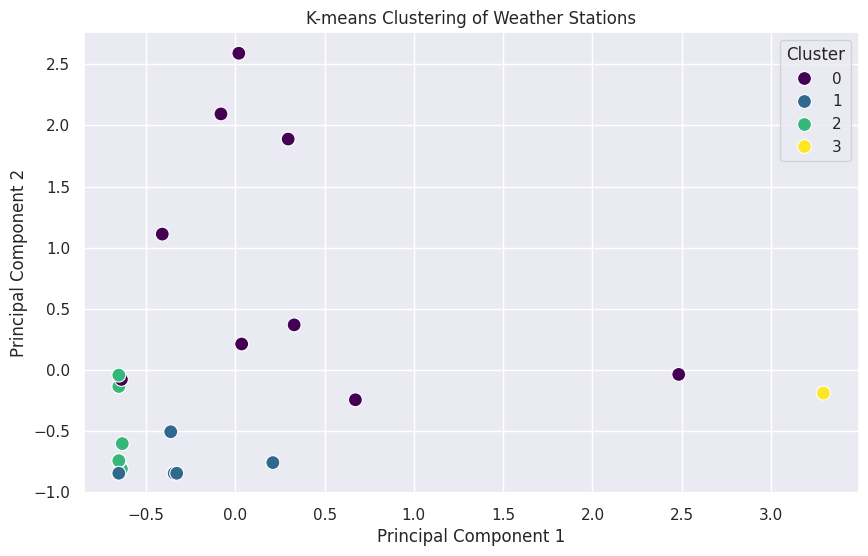

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Change n_clusters as needed
kmeans_labels = kmeans.fit_predict(scaled_data)

# Plot K-means results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title("K-means Clustering of Weather Stations")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()


* DBSCAN

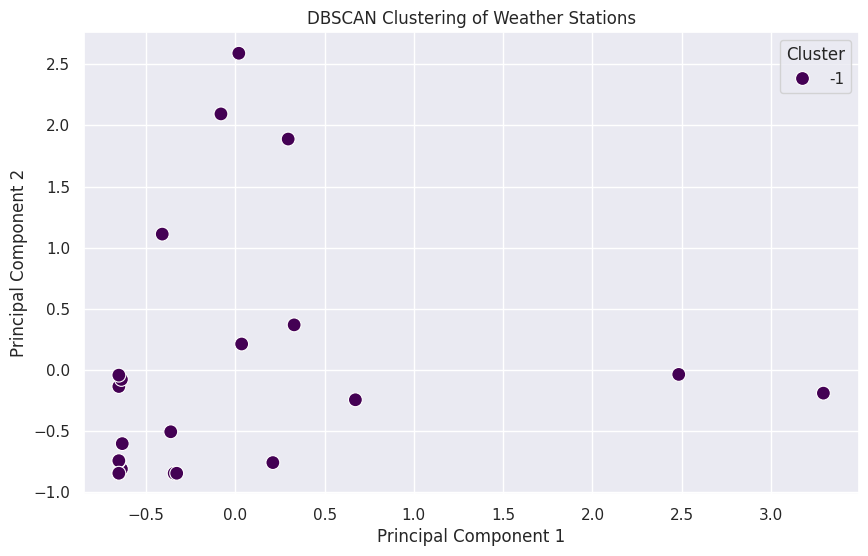

In [69]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(scaled_data)

# Plot DBSCAN results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=dbscan_labels, palette='viridis', s=100)
plt.title("DBSCAN Clustering of Weather Stations")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()


* TSNE

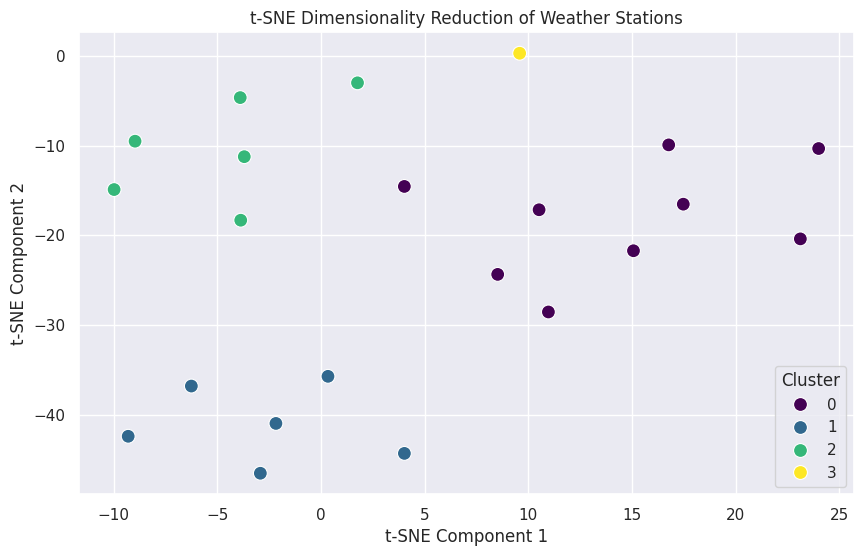

In [72]:
from sklearn.manifold import TSNE

# Adjust perplexity to be less than the number of samples (22)
tsne = TSNE(n_components=2, perplexity=10, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title("t-SNE Dimensionality Reduction of Weather Stations")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title='Cluster')
plt.show()



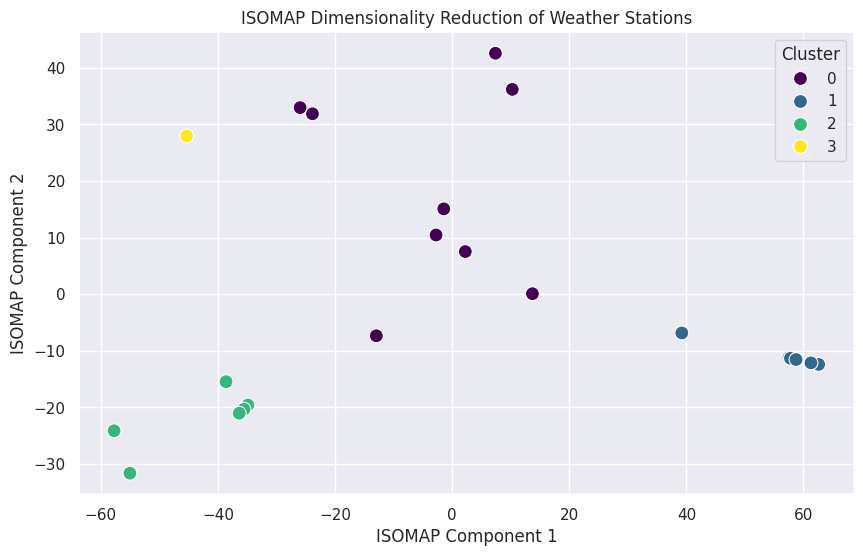

In [71]:
from sklearn.manifold import Isomap

# Apply ISOMAP for dimensionality reduction
isomap = Isomap(n_components=2)
isomap_results = isomap.fit_transform(scaled_data)

# Plot ISOMAP results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=isomap_results[:, 0], y=isomap_results[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title("ISOMAP Dimensionality Reduction of Weather Stations")
plt.xlabel("ISOMAP Component 1")
plt.ylabel("ISOMAP Component 2")
plt.legend(title='Cluster')
plt.show()


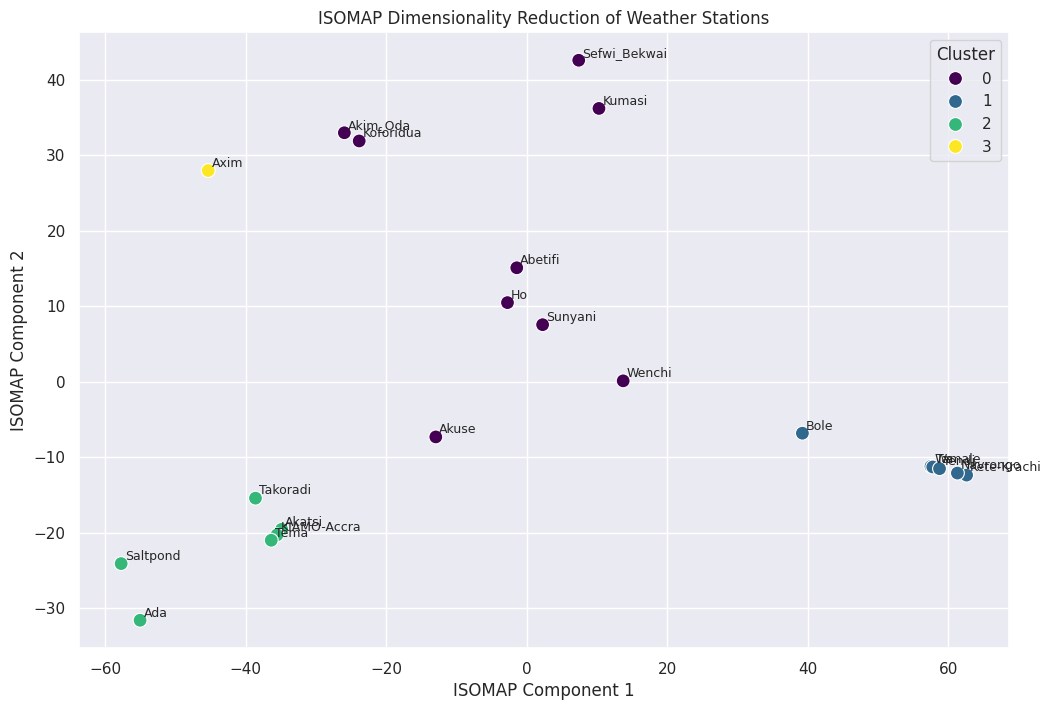

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rainfall_df.T)  # Transpose to get station labels as rows

# Apply ISOMAP for dimensionality reduction
isomap = Isomap(n_components=2)
isomap_results = isomap.fit_transform(scaled_data)

# Perform clustering (e.g., K-means)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Plot ISOMAP results with labels
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=isomap_results[:, 0],
    y=isomap_results[:, 1],
    hue=clusters,
    palette="viridis",
    s=100,
    legend='full'
)

# Add station names as labels
for i, station in enumerate(df.columns):
    plt.text(isomap_results[i, 0] + 0.5, isomap_results[i, 1] + 0.5, station, fontsize=9)

plt.title("ISOMAP Dimensionality Reduction of Weather Stations")
plt.xlabel("ISOMAP Component 1")
plt.ylabel("ISOMAP Component 2")
plt.legend(title="Cluster")
plt.show()


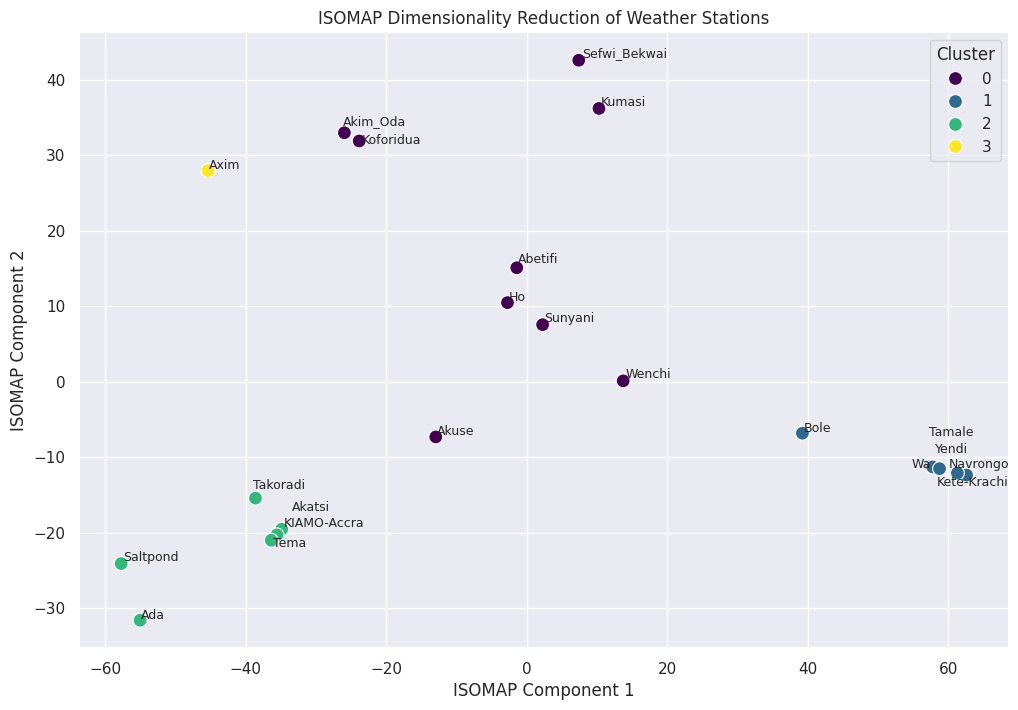

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap
from adjustText import adjust_text

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rainfall_df.T)  # Transpose to get station labels as rows

# Apply ISOMAP for dimensionality reduction
isomap = Isomap(n_components=2)
isomap_results = isomap.fit_transform(scaled_data)

# Perform clustering (e.g., K-means)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Plot ISOMAP results with labels
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=isomap_results[:, 0],
    y=isomap_results[:, 1],
    hue=clusters,
    palette="viridis",
    s=100,
    legend='full'
)

# Create a list to hold the text labels
texts = []

# Add station names as labels
for i, station in enumerate(df.columns):
    text = plt.text(isomap_results[i, 0], isomap_results[i, 1], station, fontsize=9)
    texts.append(text)

# Adjust text labels to avoid overlap
adjust_text(texts)

plt.title("ISOMAP Dimensionality Reduction of Weather Stations")
plt.xlabel("ISOMAP Component 1")
plt.ylabel("ISOMAP Component 2")
plt.legend(title="Cluster")
plt.show()


In [75]:
# !pip install adjustText


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [78]:
clusters

array([2, 2, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 3, 2, 1, 2, 1, 0, 0, 1, 0],
      dtype=int32)

In [77]:
isomap_results

array([[-34.90503203, -19.56481636],
       [-38.63325972, -15.44079057],
       [ -1.4404106 ,  15.08159683],
       [ 62.58798788, -12.38562778],
       [-35.56723232, -20.30921018],
       [-25.9808636 ,  32.97123229],
       [-55.05676522, -31.61561238],
       [ 57.51983989, -11.2225888 ],
       [-12.96455651,  -7.32917377],
       [ 13.70441045,   0.1013092 ],
       [  2.23612805,   7.54249756],
       [-23.86997032,  31.882678  ],
       [ 57.76962255, -11.30713104],
       [-45.36056439,  27.96849103],
       [-36.38973864, -21.01877454],
       [ 58.73378637, -11.52945116],
       [-57.7525175 , -24.11067478],
       [ 39.21529397,  -6.83439469],
       [ -2.76220741,  10.4666143 ],
       [ 10.25938982,  36.1937432 ],
       [ 61.27815885, -12.11584415],
       [  7.37850045,  42.57592779]])

In [79]:
rainfall_df.columns

Index(['Akatsi', 'Takoradi', 'Abetifi', 'Kete-Krachi', 'KIAMO-Accra',
       'Akim_Oda', 'Ada', 'Wa', 'Akuse', 'Wenchi', 'Sunyani', 'Koforidua',
       'Tamale', 'Axim', 'Tema', 'Yendi', 'Saltpond', 'Bole', 'Ho', 'Kumasi',
       'Navrongo', 'Sefwi_Bekwai'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

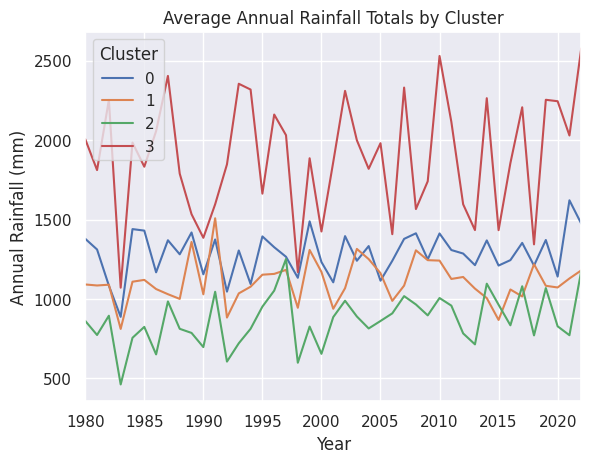

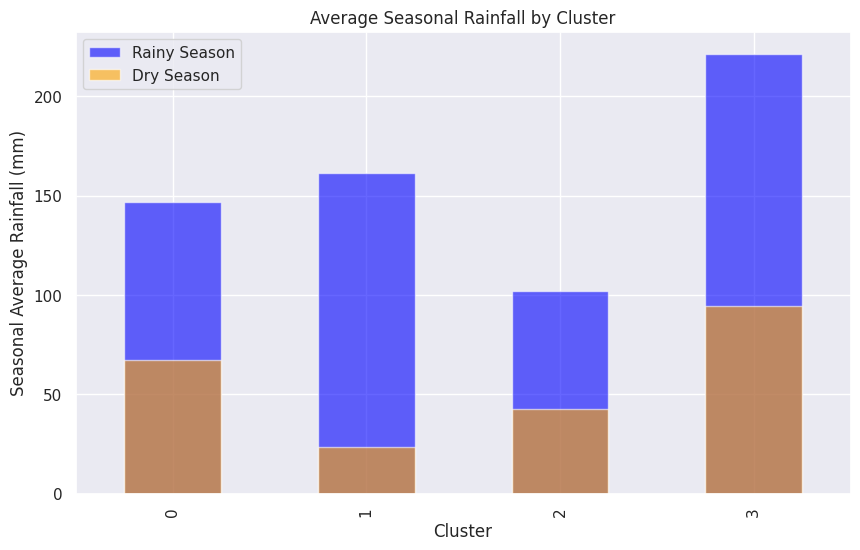

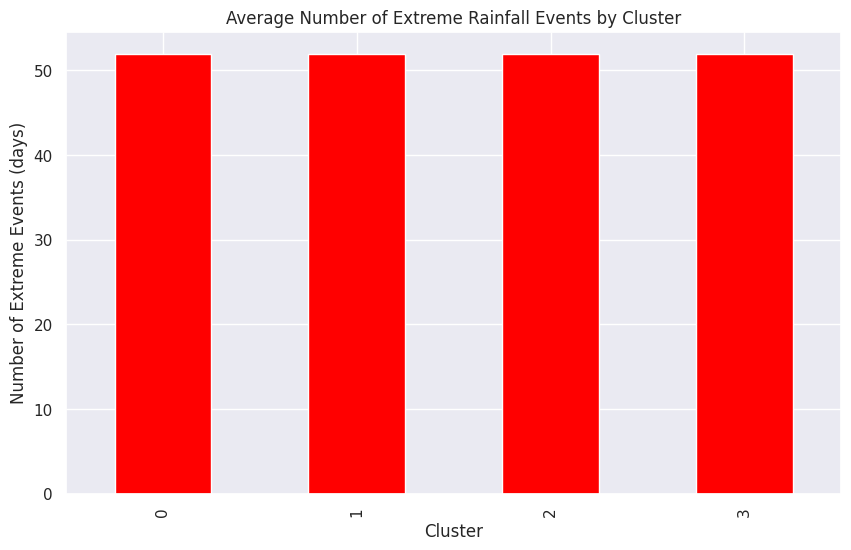

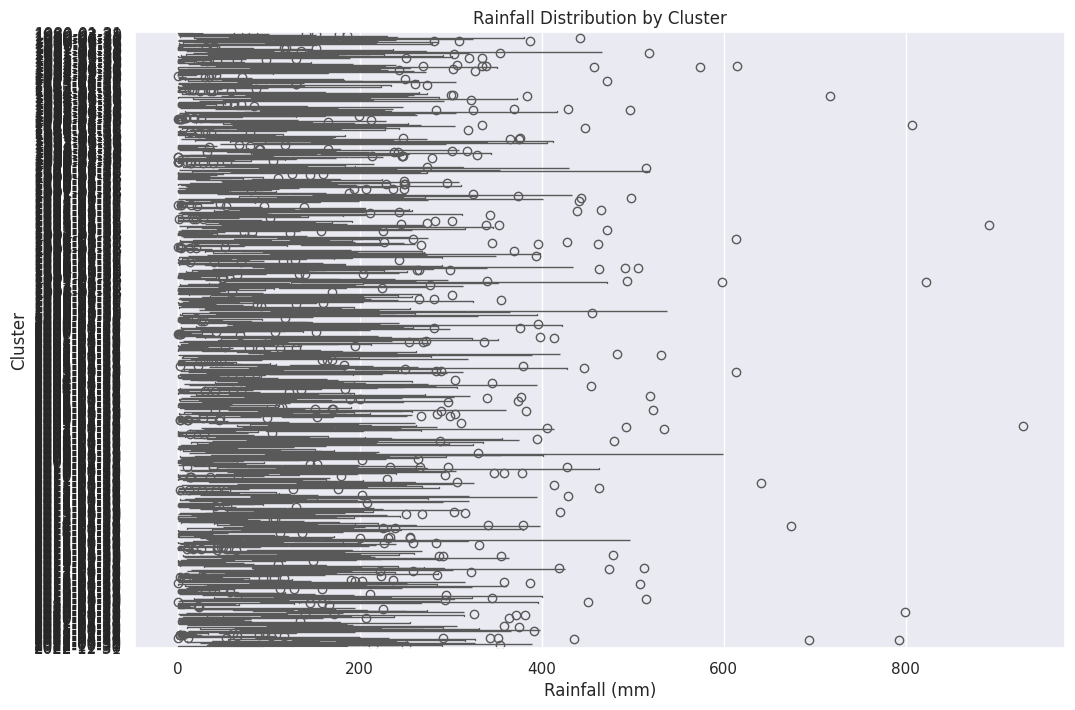

Quantiles (25th, 50th, 75th) for Each Cluster:
Cluster        Date      
0        0.25  1980-01-31     12.0
               1980-02-29     41.7
               1980-03-31     37.1
               1980-04-30     67.5
               1980-05-31    152.3
                             ...  
3        0.75  2022-08-31     75.9
               2022-09-30    112.4
               2022-10-31    254.0
               2022-11-30    214.2
               2022-12-31     52.1
Length: 6192, dtype: float64


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `rainfall_df` is a DataFrame where each column represents a station, and each row represents daily rainfall
# `clusters` is an array containing the K-means cluster label for each station in `rainfall_df.columns`

# Add the cluster labels to a DataFrame for easier grouping
station_clusters = pd.DataFrame({'Station': rainfall_df.columns, 'Cluster': clusters})

# 1. Calculate Annual Totals for Each Station
annual_totals = rainfall_df.resample('Y').sum()  # Resample by year and sum to get annual rainfall
annual_totals_clustered = annual_totals.groupby(station_clusters.set_index('Station')['Cluster'], axis=1).mean()

# Plot Annual Totals by Cluster
plt.figure(figsize=(10, 6))
annual_totals_clustered.plot(title="Average Annual Rainfall Totals by Cluster")
plt.ylabel("Annual Rainfall (mm)")
plt.xlabel("Year")
plt.legend(title="Cluster")
plt.show()

# 2. Calculate Seasonal Variations (example: rainy season vs. dry season)
# Define seasonal periods (example for Ghana - adjust based on context)
rainy_season = (rainfall_df.index.month >= 5) & (rainfall_df.index.month <= 10)  # May to October
dry_season = ~rainy_season  # All other months

# Calculate seasonal totals for each cluster
rainy_season_totals = rainfall_df[rainy_season].groupby(station_clusters.set_index('Station')['Cluster'], axis=1).mean()
dry_season_totals = rainfall_df[dry_season].groupby(station_clusters.set_index('Station')['Cluster'], axis=1).mean()

# Plot Seasonal Variations
plt.figure(figsize=(10, 6))
rainy_season_totals.mean().plot(kind='bar', color='blue', alpha=0.6, label="Rainy Season")
dry_season_totals.mean().plot(kind='bar', color='orange', alpha=0.6, label="Dry Season")
plt.title("Average Seasonal Rainfall by Cluster")
plt.ylabel("Seasonal Average Rainfall (mm)")
plt.legend()
plt.show()

# 3. Identify Extreme Rainfall Events (e.g., days with >90th percentile rainfall)
extreme_threshold = rainfall_df.quantile(0.90)  # Define the 90th percentile threshold for each station
extreme_events = (rainfall_df > extreme_threshold).sum().groupby(station_clusters.set_index('Station')['Cluster']).mean()

# Plot Extreme Events by Cluster
plt.figure(figsize=(10, 6))
extreme_events.plot(kind='bar', color='red')
plt.title("Average Number of Extreme Rainfall Events by Cluster")
plt.ylabel("Number of Extreme Events (days)")
plt.xlabel("Cluster")
plt.show()

# 4. Additional Statistical Analysis: Box Plots for Rainfall Distribution by Cluster
# Box plot to show distribution, median, quartiles, and outliers within each cluster
plt.figure(figsize=(12, 8))
sns.boxplot(data=rainfall_df.T, orient='h', palette="Set2")
plt.title("Rainfall Distribution by Cluster")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Cluster")
plt.show()

# Another option: Quantile Analysis
quantiles = rainfall_df.groupby(station_clusters.set_index('Station')['Cluster'], axis=1).quantile([0.25, 0.5, 0.75]).unstack()

# Display quantiles for each cluster
print("Quantiles (25th, 50th, 75th) for Each Cluster:")
print(quantiles)


In [81]:
quantiles

Cluster        Date      
0        0.25  1980-01-31     12.0
               1980-02-29     41.7
               1980-03-31     37.1
               1980-04-30     67.5
               1980-05-31    152.3
                             ...  
3        0.75  2022-08-31     75.9
               2022-09-30    112.4
               2022-10-31    254.0
               2022-11-30    214.2
               2022-12-31     52.1
Length: 6192, dtype: float64

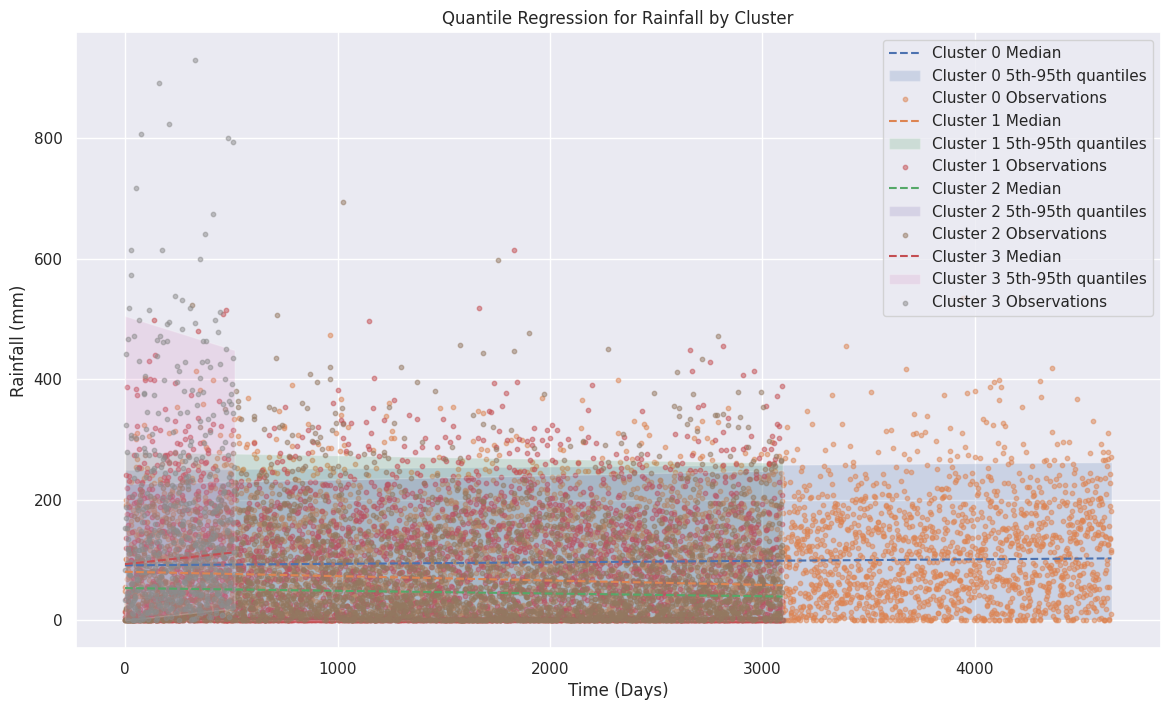

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import QuantileRegressor
from sklearn.preprocessing import StandardScaler

# Assuming rainfall_df is your DataFrame with daily rainfall data, with dates as index
# and the 'station_clusters' DataFrame holds cluster information

# Flatten the DataFrame to fit the quantile regressor
rainfall_flat = rainfall_df.melt(var_name='Station', value_name='Rainfall')
rainfall_flat['Cluster'] = rainfall_flat['Station'].map(station_clusters.set_index('Station')['Cluster'])

# Define quantiles to fit
quantiles = [0.05, 0.5, 0.95]
solver = 'highs'

# Create a figure for plotting
plt.figure(figsize=(14, 8))

# Loop through each cluster
for cluster in sorted(rainfall_flat['Cluster'].unique()):
    cluster_data = rainfall_flat[rainfall_flat['Cluster'] == cluster]
    
    # Prepare the input for quantile regression
    # For this example, let's use the index (time) as a feature
    # You may need to transform dates to numerical values if necessary
    X = np.arange(len(cluster_data)).reshape(-1, 1)  # Time as a single feature
    y = cluster_data['Rainfall'].values
    
    # Fit the Quantile Regressor for each quantile
    predictions = {}
    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
        qr.fit(X, y)
        predictions[quantile] = qr.predict(X)
    
    # Plot the quantile predictions
    plt.plot(X, predictions[0.5], label=f"Cluster {cluster} Median", linestyle='dashed')  # Median
    plt.fill_between(X.flatten(), predictions[0.05], predictions[0.95], alpha=0.2, label=f"Cluster {cluster} 5th-95th quantiles")
    
    # Scatter plot of actual rainfall data for this cluster
    plt.scatter(X, y, alpha=0.5, label=f"Cluster {cluster} Observations", s=10)

plt.title("Quantile Regression for Rainfall by Cluster")
plt.xlabel("Time (Days)")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()

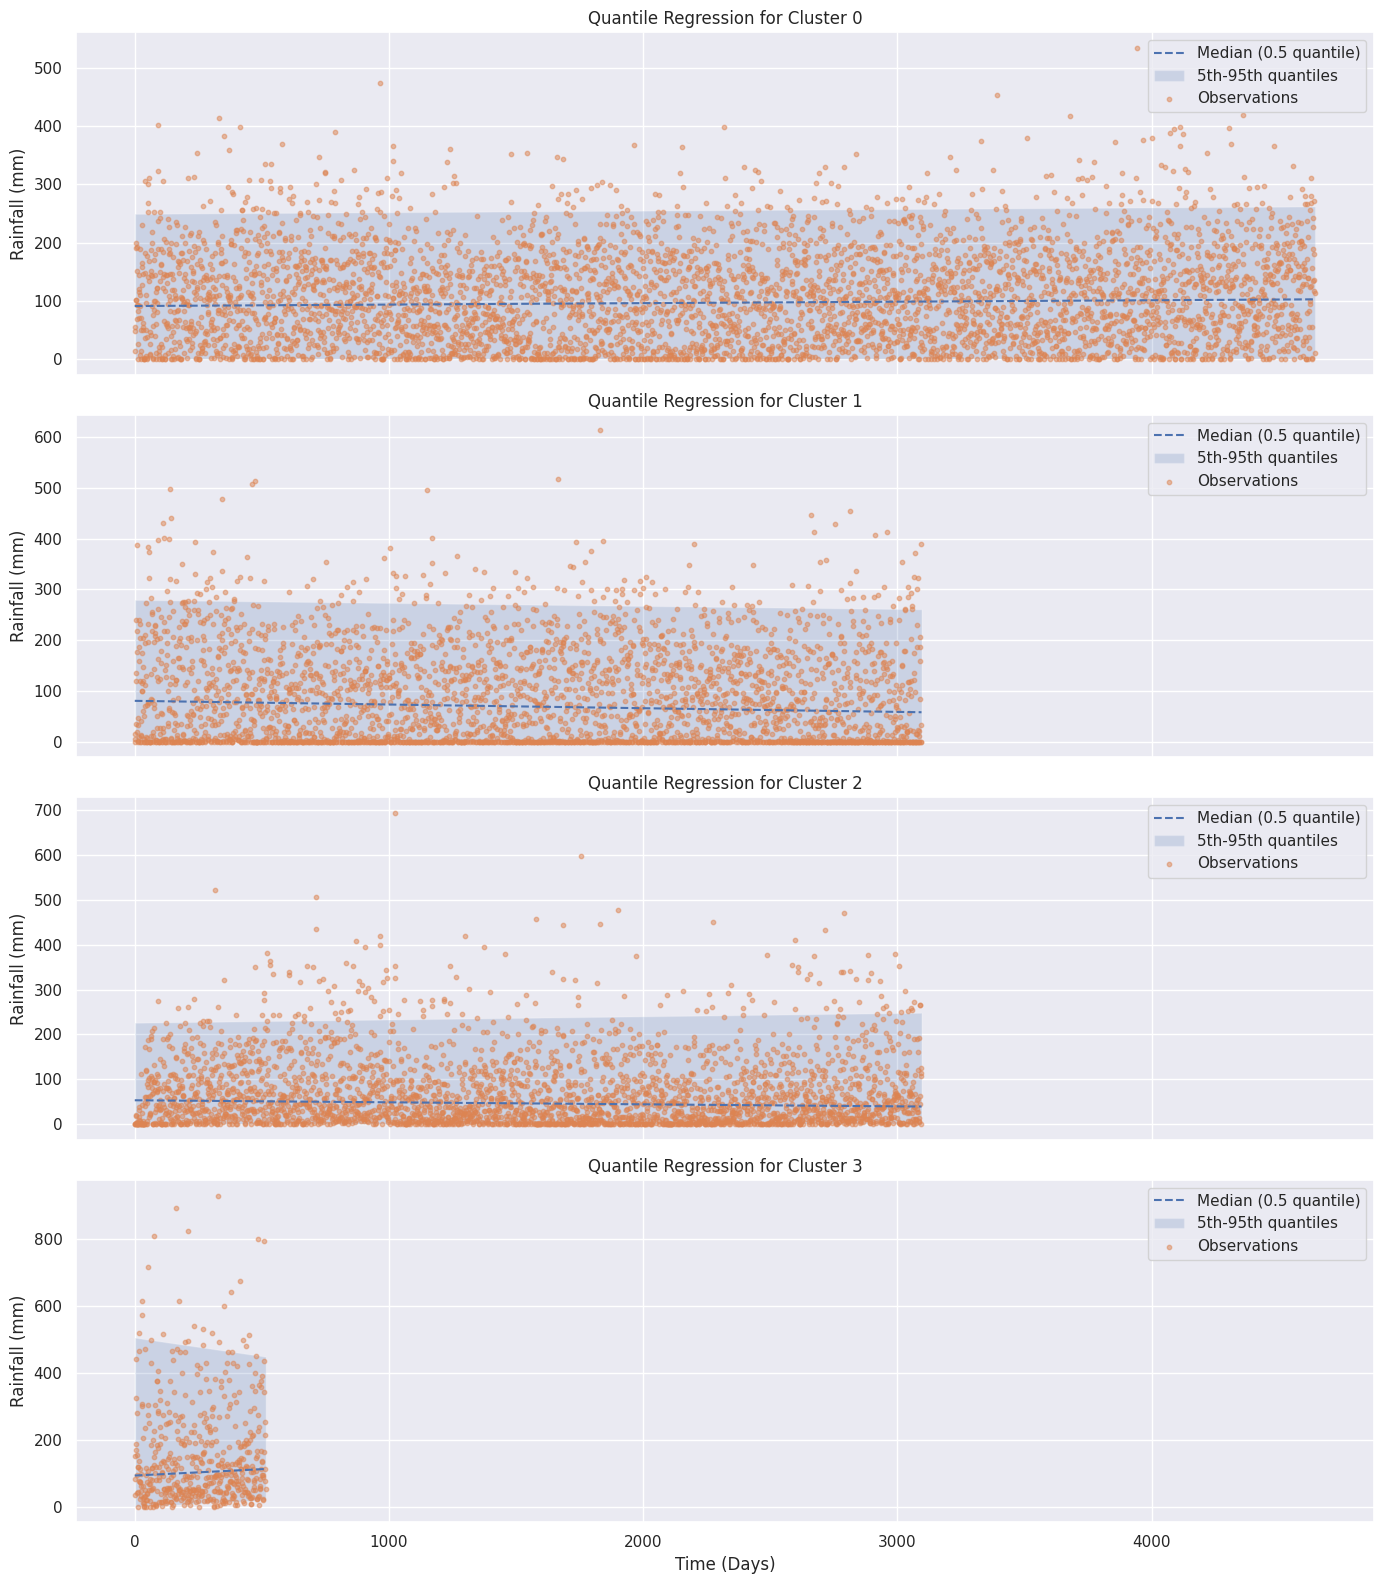

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import QuantileRegressor

# Assuming rainfall_df is your DataFrame with daily rainfall data, with dates as index
# and the 'station_clusters' DataFrame holds cluster information

# Flatten the DataFrame to fit the quantile regressor
rainfall_flat = rainfall_df.melt(var_name='Station', value_name='Rainfall')
rainfall_flat['Cluster'] = rainfall_flat['Station'].map(station_clusters.set_index('Station')['Cluster'])

# Define quantiles to fit
quantiles = [0.05, 0.5, 0.95]
solver = 'highs'

# Set up a 4x1 subplot layout
num_clusters = len(rainfall_flat['Cluster'].unique())
fig, axs = plt.subplots(num_clusters, 1, figsize=(14, 16), sharex=True)
fig.tight_layout(pad=4)

# Loop through each cluster and create a subplot
for i, cluster in enumerate(sorted(rainfall_flat['Cluster'].unique())):
    cluster_data = rainfall_flat[rainfall_flat['Cluster'] == cluster]
    # print(cluster_data)
    # print(len(cluster_data))
    
    # Prepare the input for quantile regression
    X = np.arange(len(cluster_data)).reshape(-1, 1)  # Time as a single feature
    y = cluster_data['Rainfall'].values
    
    # Fit the Quantile Regressor for each quantile
    predictions = {}
    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
        qr.fit(X, y)
        predictions[quantile] = qr.predict(X)
    
    # Select the current subplot axis
    ax = axs[i] if num_clusters > 1 else axs  # Handle case if only one cluster

    # Plot median quantile (0.5) line and fill between 5th and 95th quantiles
    ax.plot(X, predictions[0.5], label="Median (0.5 quantile)", linestyle='dashed')
    ax.fill_between(X.flatten(), predictions[0.05], predictions[0.95], alpha=0.2, label="5th-95th quantiles")

    # Scatter plot of actual rainfall data for this cluster
    ax.scatter(X, y, alpha=0.5, s=10, label="Observations")

    # Add titles, labels, and legend
    ax.set_title(f"Quantile Regression for Cluster {cluster}")
    ax.set_ylabel("Rainfall (mm)")
    ax.legend()

# Add a common X-axis label
plt.xlabel("Time (Days)")

# Adjust layout for readability
plt.tight_layout()
plt.show()


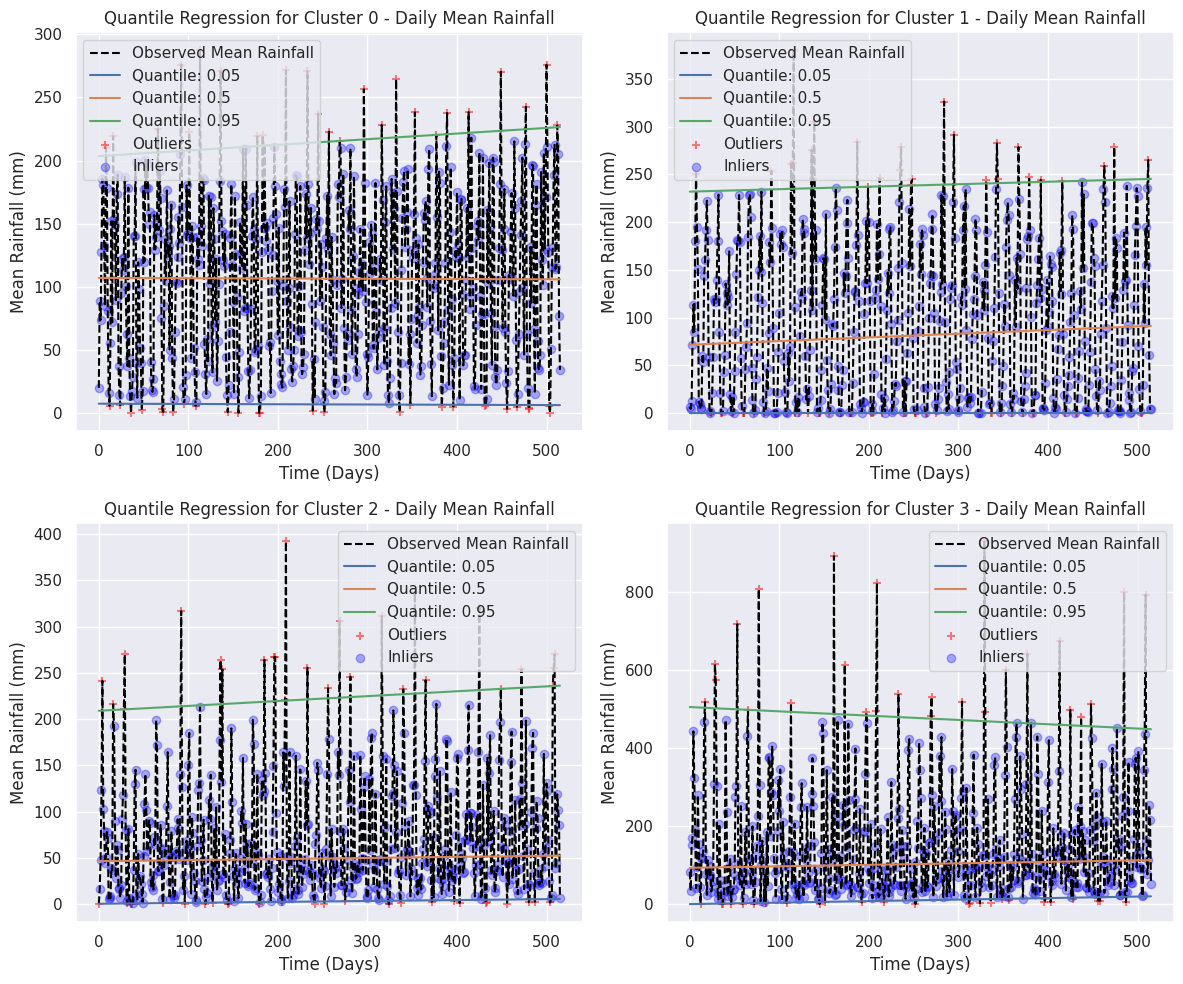

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import QuantileRegressor

# Define quantiles for the regression
quantiles = [0.05, 0.5, 0.95]
predictions = {}

# Set up 2x2 subplots for up to four clusters
num_clusters = len(sorted(station_clusters['Cluster'].unique()))
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(pad=4)

# Loop over each cluster and fit a Quantile Regressor to examine rainfall trends
for i, cluster in enumerate(sorted(station_clusters['Cluster'].unique())):
    # Select rainfall data for stations in the current cluster
    cluster_stations = station_clusters[station_clusters['Cluster'] == cluster]['Station']
    cluster_data = rainfall_df[cluster_stations]
    
    # Calculate mean rainfall for each day across all stations in the cluster (time series for cluster)
    X = np.arange(len(cluster_data)).reshape(-1, 1)  # Independent variable: Time (day index)
    y = cluster_data.mean(axis=1).values  # Dependent variable: Mean daily rainfall across the cluster
    
    predictions = {}  # Reset predictions for each cluster
    out_bounds_predictions = np.zeros_like(y, dtype=np.bool_)  # Track outliers outside quantile range
    
    # Fit Quantile Regressor for each specified quantile
    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0)  # Adjust alpha if regularization is needed
        y_pred = qr.fit(X, y).predict(X)
        predictions[quantile] = y_pred

        # Track data points outside the quantile range
        if quantile == min(quantiles):
            out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred >= y)
        elif quantile == max(quantiles):
            out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred <= y)
    
    # Determine subplot position
    ax = axs[i // 2, i % 2]
    
    # Plot quantile regression results for the cluster
    ax.plot(X, y, color="black", linestyle="dashed", label="Observed Mean Rainfall")
    
    # Plot each quantile line
    for quantile, y_pred in predictions.items():
        ax.plot(X, y_pred, label=f"Quantile: {quantile}")
    
    # Highlight points outside the predicted quantile interval
    ax.scatter(X[out_bounds_predictions], y[out_bounds_predictions], color="red", marker="+", alpha=0.5, label="Outliers")
    ax.scatter(X[~out_bounds_predictions], y[~out_bounds_predictions], color="blue", alpha=0.3, label="Inliers")
    
    # Add labels and legend
    ax.legend()
    ax.set_title(f"Quantile Regression for Cluster {cluster} - Daily Mean Rainfall")
    ax.set_xlabel("Time (Days)")
    ax.set_ylabel("Mean Rainfall (mm)")

# Adjust layout for readability
plt.tight_layout()
plt.show()


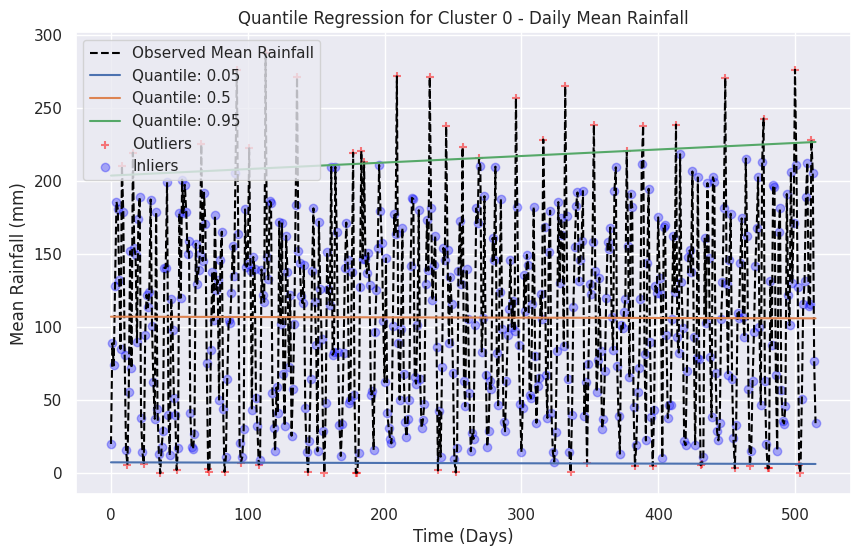

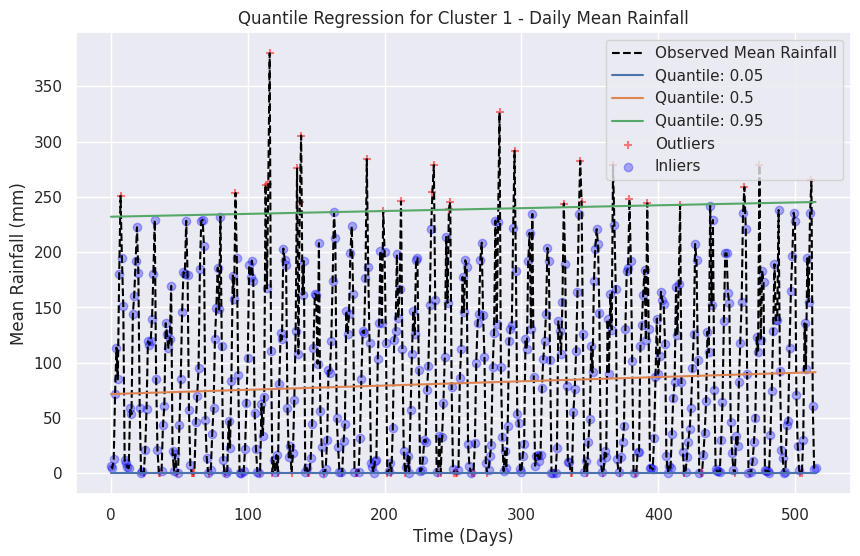

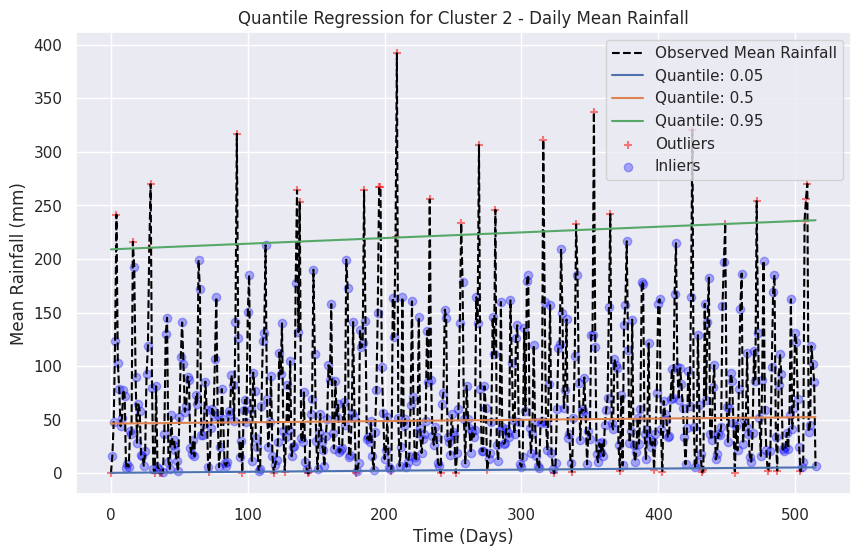

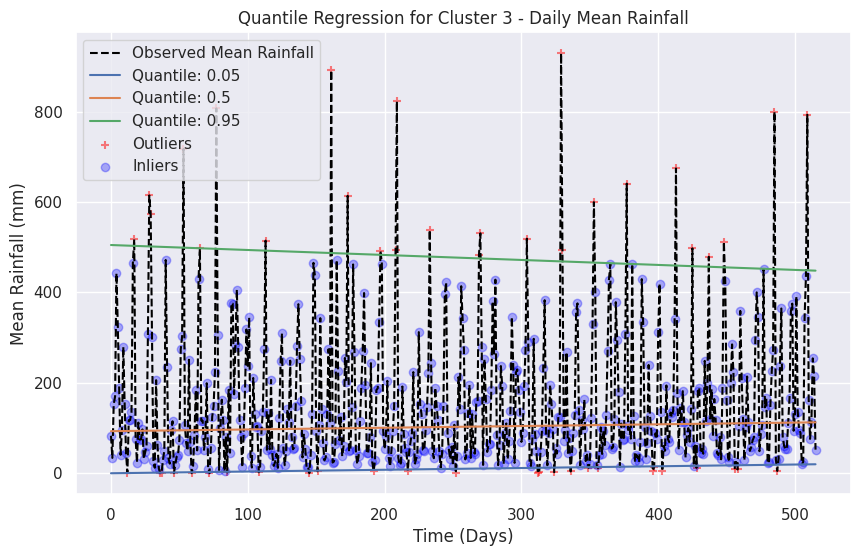

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import QuantileRegressor

# Define quantiles for the regression
quantiles = [0.05, 0.5, 0.95]
predictions = {}

# Loop over each cluster and fit a Quantile Regressor to examine rainfall trends
for cluster in sorted(station_clusters['Cluster'].unique()):
    # Select rainfall data for stations in the current cluster
    cluster_stations = station_clusters[station_clusters['Cluster'] == cluster]['Station']
    cluster_data = rainfall_df[cluster_stations]
    
    # Calculate mean rainfall for each day across all stations in the cluster (time series for cluster)
    X = np.arange(len(cluster_data)).reshape(-1, 1)  # Independent variable: Time (day index)
    y = cluster_data.mean(axis=1).values  # Dependent variable: Mean daily rainfall across the cluster
    
    predictions = {}  # Reset predictions for each cluster
    out_bounds_predictions = np.zeros_like(y, dtype=np.bool_)  # Track outliers outside quantile range
    
    # Fit Quantile Regressor for each specified quantile
    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0)  # Adjust alpha if regularization is needed
        y_pred = qr.fit(X, y).predict(X)
        predictions[quantile] = y_pred

        # Track data points outside the quantile range
        if quantile == min(quantiles):
            out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred >= y)
        elif quantile == max(quantiles):
            out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred <= y)
    
    # Plot quantile regression results for the cluster
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, color="black", linestyle="dashed", label="Observed Mean Rainfall")
    
    # Plot each quantile line
    for quantile, y_pred in predictions.items():
        plt.plot(X, y_pred, label=f"Quantile: {quantile}")
    
    # Highlight points outside the predicted quantile interval
    plt.scatter(X[out_bounds_predictions], y[out_bounds_predictions], color="red", marker="+", alpha=0.5, label="Outliers")
    plt.scatter(X[~out_bounds_predictions], y[~out_bounds_predictions], color="blue", alpha=0.3, label="Inliers")
    
    # Add labels and legend
    plt.legend()
    plt.title(f"Quantile Regression for Cluster {cluster} - Daily Mean Rainfall")
    plt.xlabel("Time (Days)")
    plt.ylabel("Mean Rainfall (mm)")
    plt.show()


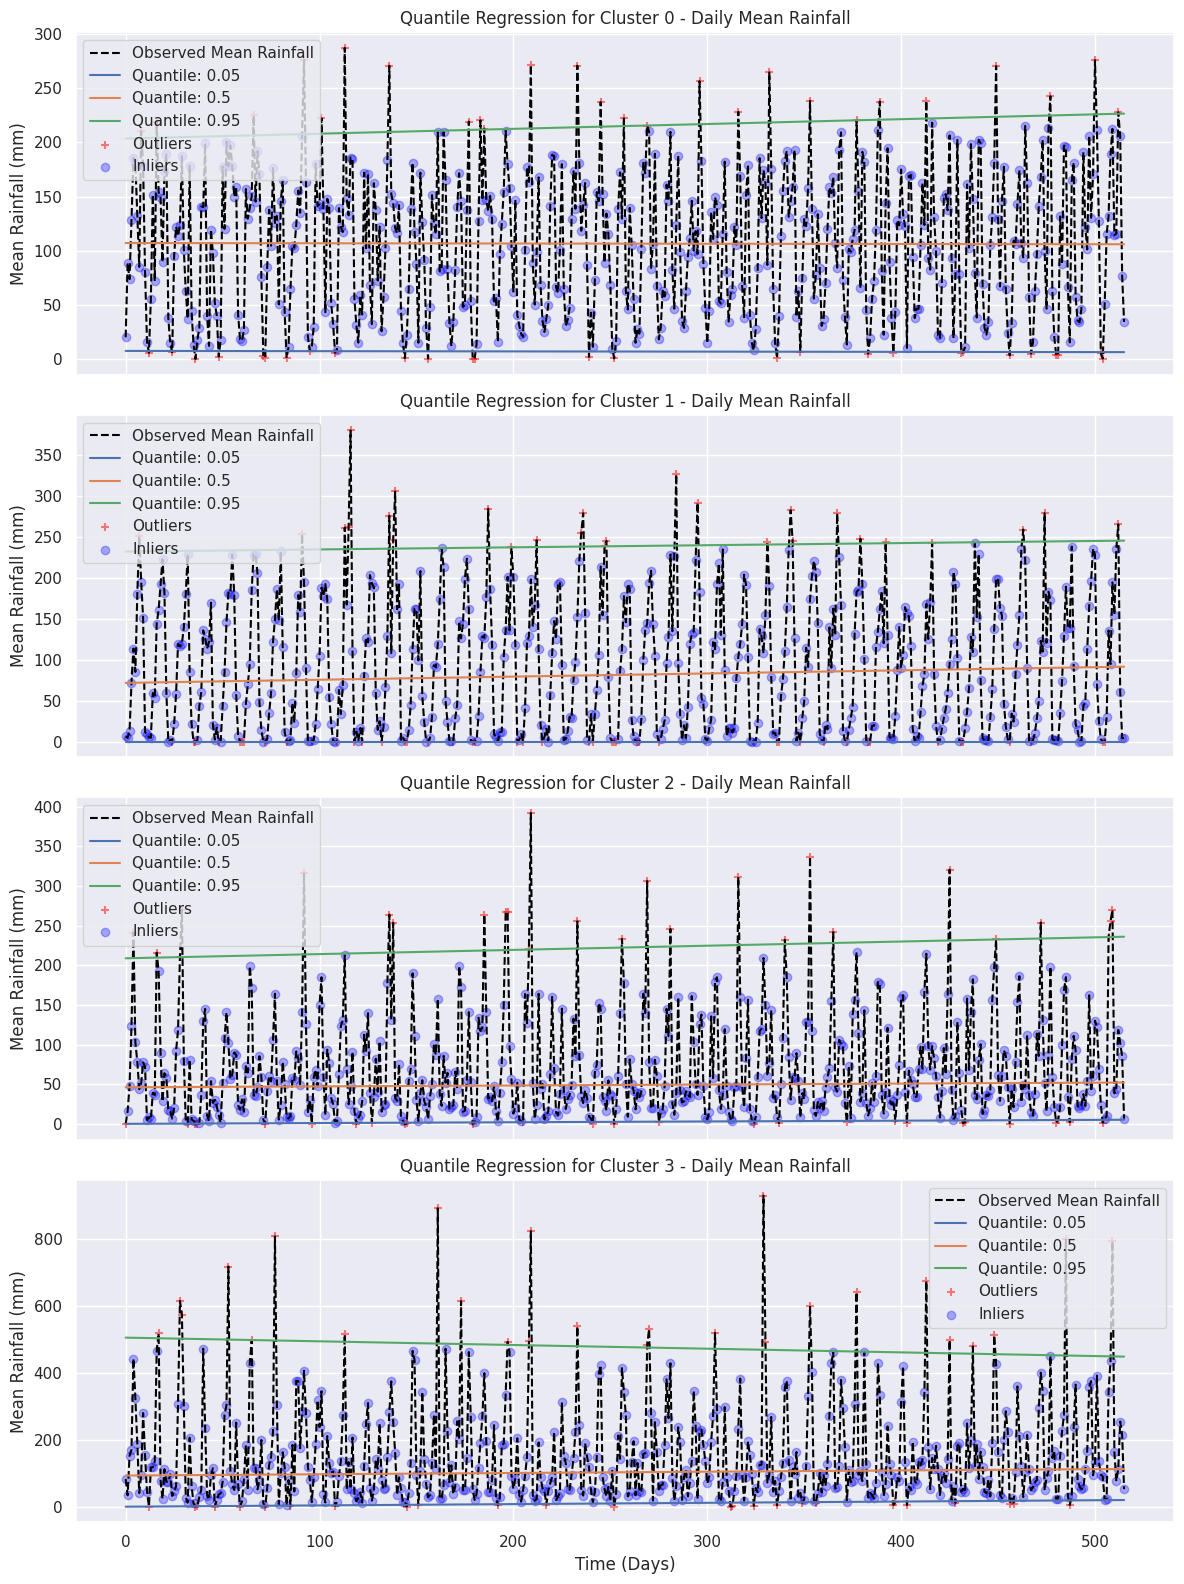

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import QuantileRegressor

# Define quantiles for the regression
quantiles = [0.05, 0.5, 0.95]
predictions = {}

# Set up a 4x1 subplot layout for up to four clusters
num_clusters = len(sorted(station_clusters['Cluster'].unique()))
fig, axs = plt.subplots(num_clusters, 1, figsize=(12, 16), sharex=True)
fig.tight_layout(pad=4)

# Loop over each cluster and fit a Quantile Regressor to examine rainfall trends
for i, cluster in enumerate(sorted(station_clusters['Cluster'].unique())):
    # Select rainfall data for stations in the current cluster
    cluster_stations = station_clusters[station_clusters['Cluster'] == cluster]['Station']
    cluster_data = rainfall_df[cluster_stations]
    
    # Calculate mean rainfall for each day across all stations in the cluster (time series for cluster)
    X = np.arange(len(cluster_data)).reshape(-1, 1)  # Independent variable: Time (day index)
    y = cluster_data.mean(axis=1).values  # Dependent variable: Mean daily rainfall across the cluster
    
    predictions = {}  # Reset predictions for each cluster
    out_bounds_predictions = np.zeros_like(y, dtype=np.bool_)  # Track outliers outside quantile range
    
    # Fit Quantile Regressor for each specified quantile
    for quantile in quantiles:
        qr = QuantileRegressor(quantile=quantile, alpha=0)  # Adjust alpha if regularization is needed
        y_pred = qr.fit(X, y).predict(X)
        predictions[quantile] = y_pred

        # Track data points outside the quantile range
        if quantile == min(quantiles):
            out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred >= y)
        elif quantile == max(quantiles):
            out_bounds_predictions = np.logical_or(out_bounds_predictions, y_pred <= y)
    
    # Determine subplot position
    ax = axs[i] if num_clusters > 1 else axs  # Handle case with a single cluster
    
    # Plot quantile regression results for the cluster
    ax.plot(X, y, color="black", linestyle="dashed", label="Observed Mean Rainfall")
    
    # Plot each quantile line
    for quantile, y_pred in predictions.items():
        ax.plot(X, y_pred, label=f"Quantile: {quantile}")
    
    # Highlight points outside the predicted quantile interval
    ax.scatter(X[out_bounds_predictions], y[out_bounds_predictions], color="red", marker="+", alpha=0.5, label="Outliers")
    ax.scatter(X[~out_bounds_predictions], y[~out_bounds_predictions], color="blue", alpha=0.3, label="Inliers")
    
    # Add labels and legend
    ax.legend()
    ax.set_title(f"Quantile Regression for Cluster {cluster} - Daily Mean Rainfall")
    ax.set_ylabel("Mean Rainfall (mm)")

# Add a common X-axis label for time
plt.xlabel("Time (Days)")

# Adjust layout for readability
plt.tight_layout()
plt.show()


In [87]:
X = np.arange(len(cluster_data)).reshape(-1, 1)

In [88]:
len(X)

516